# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**
This problem revolves around the used cars market. Understanding the factors that influence the price of used cars. Analizing these factors can provide insights into market trends, costumer preferences and pricing strategies

 - Why is this problem important to solve?

Is a problem important to solve because it benefits the costumer as much as the seller. The costumer can understand the factors that affect used car price to be inform when he wants to buy and make better decisions and deals. It also benefits the seller because they can use this information to set competitive prices, optimize the inventory and improve sales efficiency


### **The objective:**

 - What is the intended goal?

The primary goal is to develop a predictive model that accurately estimates the price of a used car based on its attributes. By doing so, stakeholders can gain insights into the pricing dynamics of the used car market and make data-driven decisions.

### **The key questions:**

- What are the key questions that need to be answered?

1. What are the most influential factors determining the price of a used car?
2. How do different attributes such as brand, model, year, mileage, fuel type, etc., correlate with the price of a used car?
3. How do categorical variables like fuel type, transmission, and owner type impact the price prediction?
4. What is the significance of missing values in certain features, and how should they be handled during analysis?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

Using data science techniques, we aim to build a regression model that predicts the price of used cars based on various features such as brand, model, year of manufacture, mileage, fuel type, transmission type, etc. The model will be trained on historical data with known prices, and its performance will be evaluated using appropriate metrics to ensure its reliability and accuracy in predicting prices for new instances. Ultimately, the goal is to provide stakeholders with a valuable tool for estimating the value of used cars in the market.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [123]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from scipy.stats import skew

import missingno as msno # to get visualization on missing values

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# For tuning the model
from sklearn.model_selection import GridSearchCV

### **Let us load the data**

In [124]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Capstone Project/used_cars.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [126]:
# We drop the duplicates
df.drop_duplicates(inplace=True)

In [127]:
#We drop S.No because it will not be useful for the model since it's only a serial number
df.drop(columns=['S.No.'], inplace=True)

In [128]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

<Axes: >

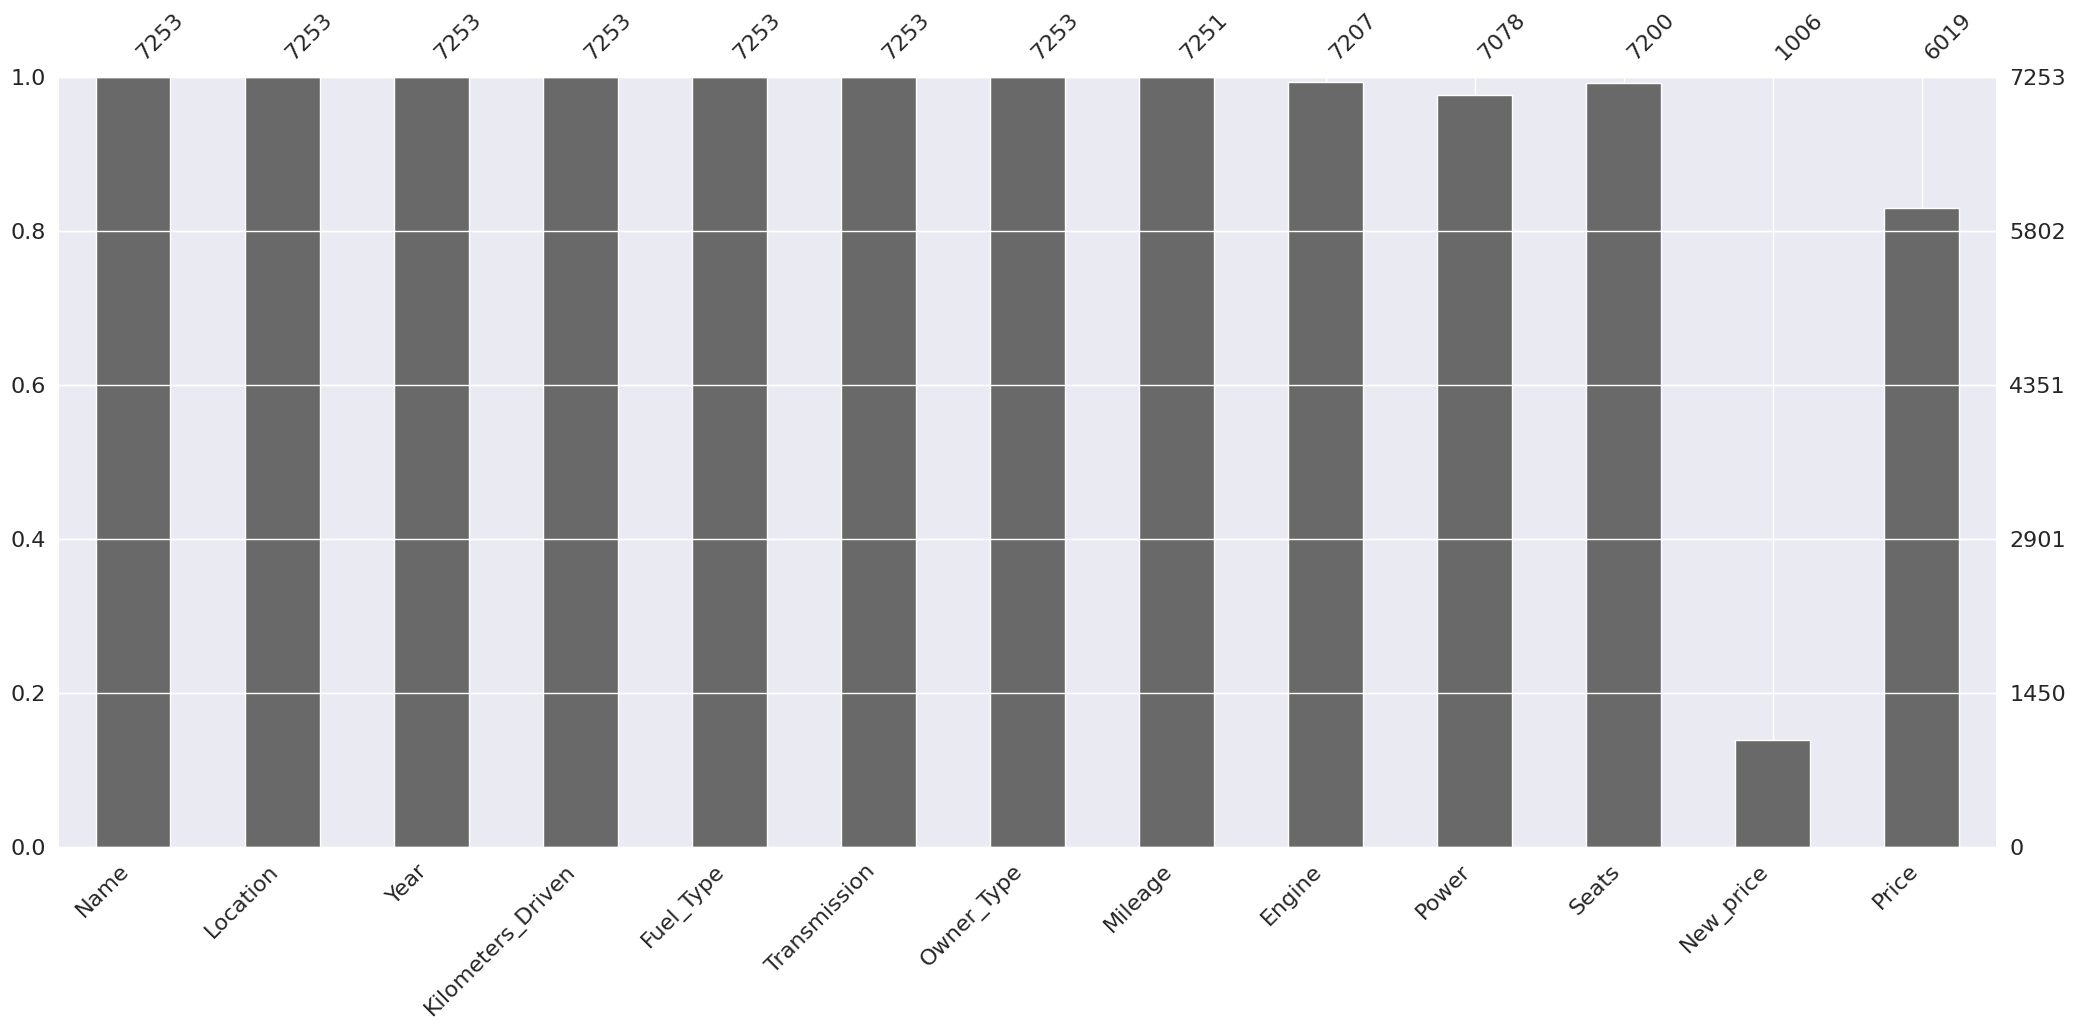

In [129]:
#Visualize missing values
msno.bar(df)

In [130]:
print("\nPercent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) # looking at columns with most Missing Values


Percent of missing :

 Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 2.41
Seats                 0.73
New_price            86.13
Price                17.01
dtype: float64


Observations:
- The dataset contains missing values in several variables: Mileage, Engine, Power, Seats, New_price, and Price.
- The New_price column has a large number of missing values—6247 in total, which makes up about 86% of the column. So we are going to drop the column.
- Price is also missing data, with 1234 entries—roughly 17% of the column.
- Seats information is missing for 53 entries. This detail is important as it has a big influence in the car's price.
- Year gives us the year when the car was manufactured, but that doesn't help us enough, so we will drop Year and create a new feature calle Age, where we will have the age in years of the car
- Engine has 46 missing values
- Mileage has only 2 missing values
- Power has 175 missing values

In [131]:
# Specify the present year
current_year = 2024  # Update with the current year

# Create the 'Age' column
df['Age'] = current_year - df['Year']

df.drop(columns=['Year'], inplace=True)

#We drop New_price because it has too many missing values and will not be useful for the model
df.drop(columns=['New_price'], inplace=True)

In [132]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [133]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0
Seats,7200.0,NaN,NaN,NaN,5.280417,0.809277,2.0,5.0,5.0,5.0,10.0


Observations:
- There are 11 unique locations where the cars are being sold from
- The max value on Kilometers_Driven is 6500000, which doesn't seems to be realistc since the average is 58699.06
- The cars manufacturing year goes from 1996-2019
- There are 2041 unique names of cars
- The min value of Mileage is 0, we can transform those to null so we can treat them as missing values
- The min value of Engine doesn't look correct, since the average is 1616.57

**Let's check the count of each unique category in each of the categorical variables**

In [134]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing the count of each unique value
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

Observations:
- Most cars Fuel_type are either diesel or petrol
- Most of the cars selling are from first or second owners
- Mahindra XUV500 W8 2WD, Maruti Swift VDI, Maruti Swift Dzire VDI are the top 3 most sold cars
- Manual transmission cars are sold more than twice as much compared to the automatic   

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [135]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram



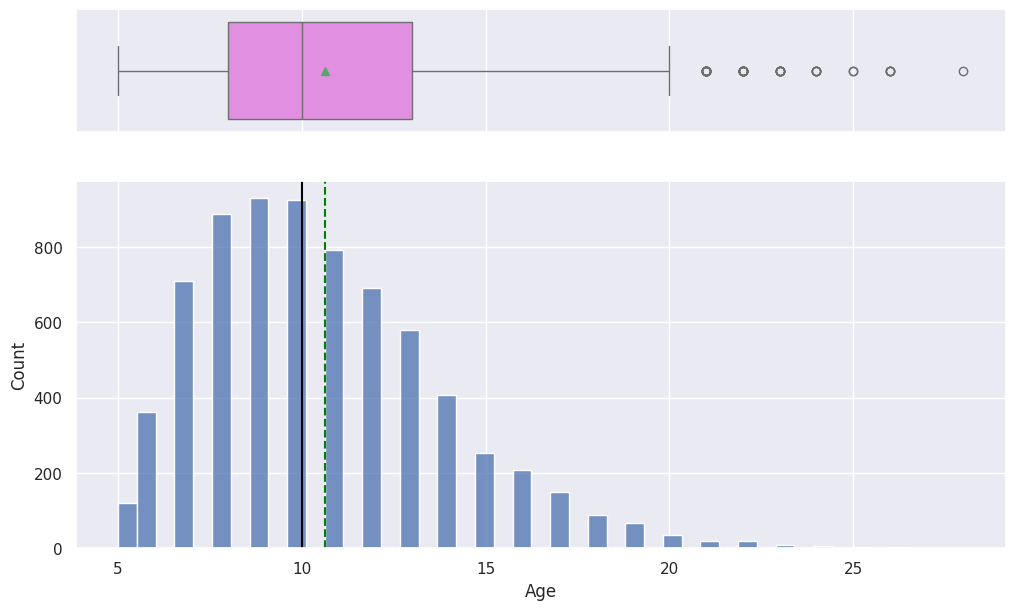

In [136]:
histogram_boxplot(df, "Age")

Observations:
- Most of the cars are between 8-10 years old
- Some outliers above 20, those are the oldest cars

Skewness of 'Kilometers_Driven': 61.582574656174806


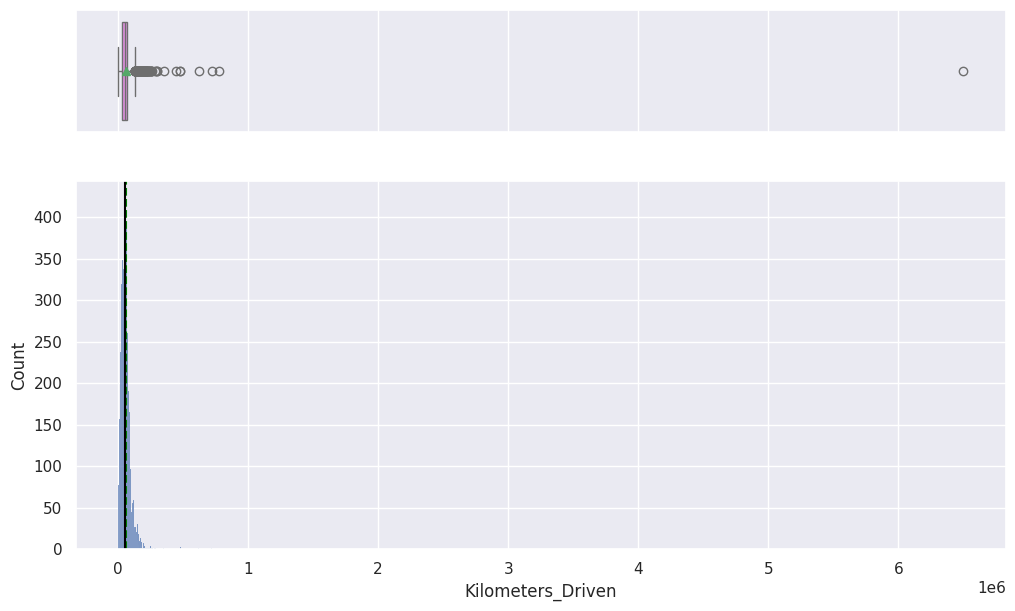

In [137]:
histogram_boxplot(df, "Kilometers_Driven")
# Function to check the skewness of a variable
skewness_value = df['Kilometers_Driven'].skew()

print("Skewness of 'Kilometers_Driven':", skewness_value)

- Kilometers_Driven has an outlier value at 6500000, that is very unrealistic, we will remove that row from the dataset.
- Also the data is highly skewed so we will apply the log function.

In [138]:
# Identify the row(s) with the outlier value(s)
outlier_rows_index = df[df['Kilometers_Driven'] == 6500000.0].index

# Drop the row(s) with outlier value(s)
df = df.drop(outlier_rows_index)

# Transform the feature 'Kilometers_Driven' with the log function and add it to the dataframe
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])


Skewness of 'kilometers_driven_log': -1.3539415163105548


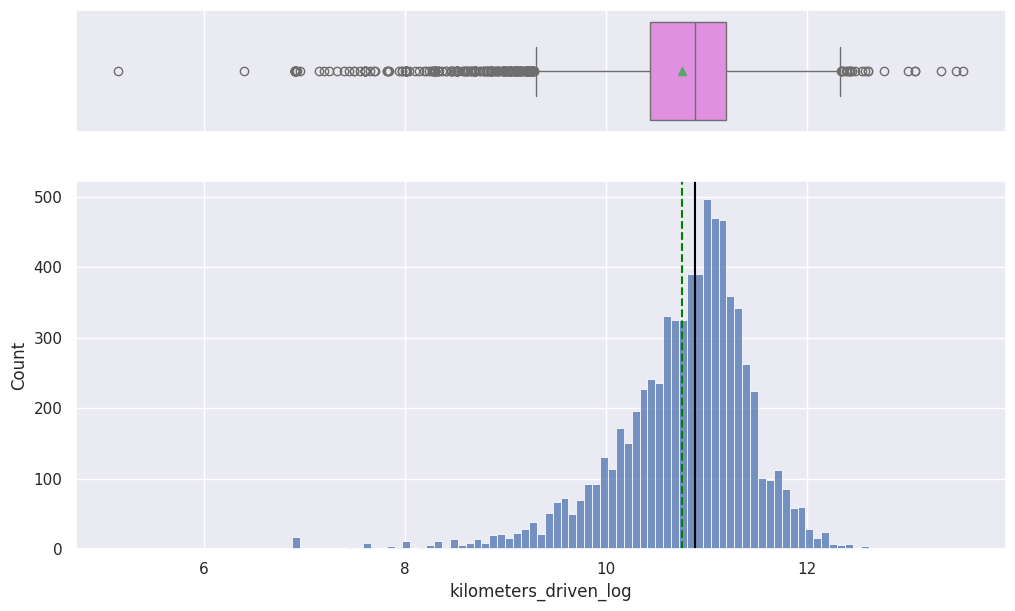

In [139]:
histogram_boxplot(df, "kilometers_driven_log")
# Function to check the skewness of a variable
skewness_value = df['kilometers_driven_log'].skew()

print("Skewness of 'kilometers_driven_log':", skewness_value)

**Observations:**
- After getting rid of the outlier and applying the log function to the Kilometers_Driven feature we successfuly reduced the skewness of the distribution


Skewness of 'Mileage': -0.43849302953596925


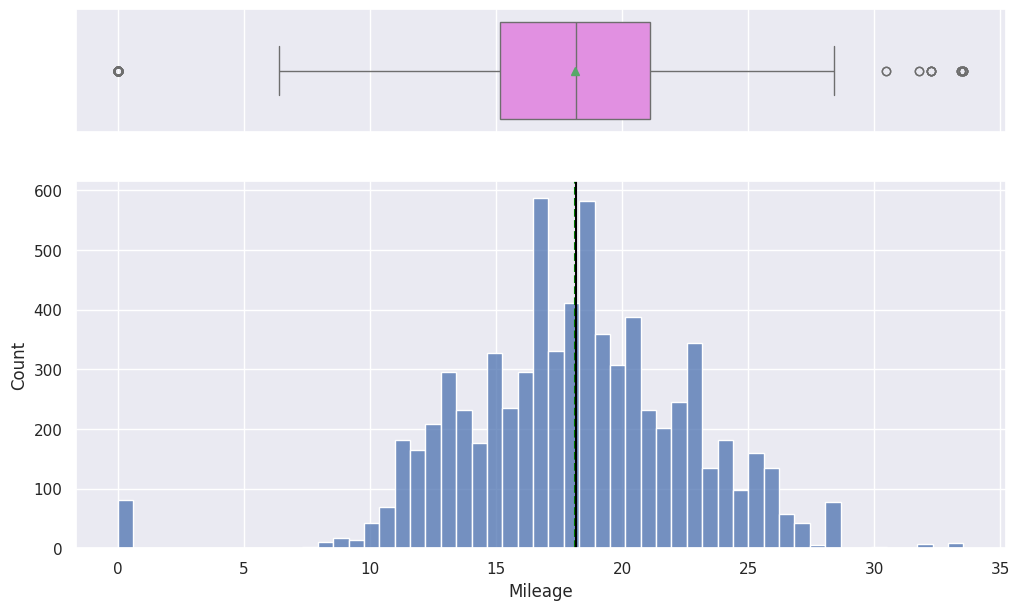

In [140]:
histogram_boxplot(df, "Mileage")
# Function to check the skewness of a variable
skewness_value = df['Mileage'].skew()

print("Skewness of 'Mileage':", skewness_value)

There are several 0 values in the Mileage variable, this is not possible, so we will transform the 0 values to null and treat them later

**Transforming 0 values to null**

In [141]:
# Replace 0.00 in 'Mileage' with NaN
df['Mileage'] = df['Mileage'].replace(0.00, np.nan)
df['Mileage'].isnull().sum()

83

Skewness of 'Mileage': 0.20494087213469345


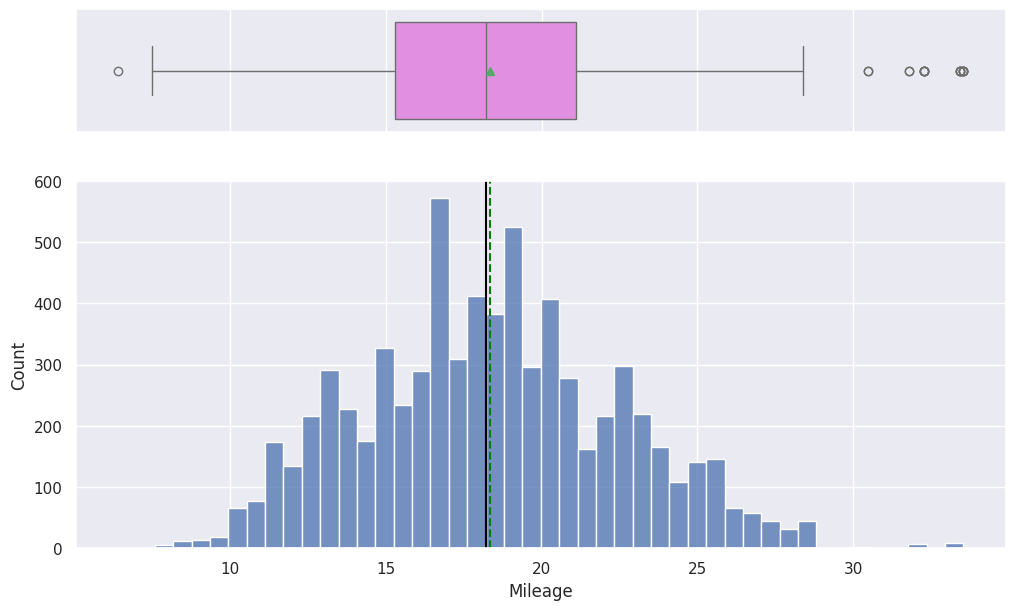

In [142]:
histogram_boxplot(df, "Mileage")
# Function to check the skewness of a variable
skewness_value = df['Mileage'].skew()

print("Skewness of 'Mileage':", skewness_value)

**Observations:**
- Mileage has several 0 values, we will replace them to NaN, so we can treat them as a null value later on
- After transforming the 0 values to null we improved the skewness of the distribution and got rid of some outliers

Skewness of 'Engine': 1.413133430829896


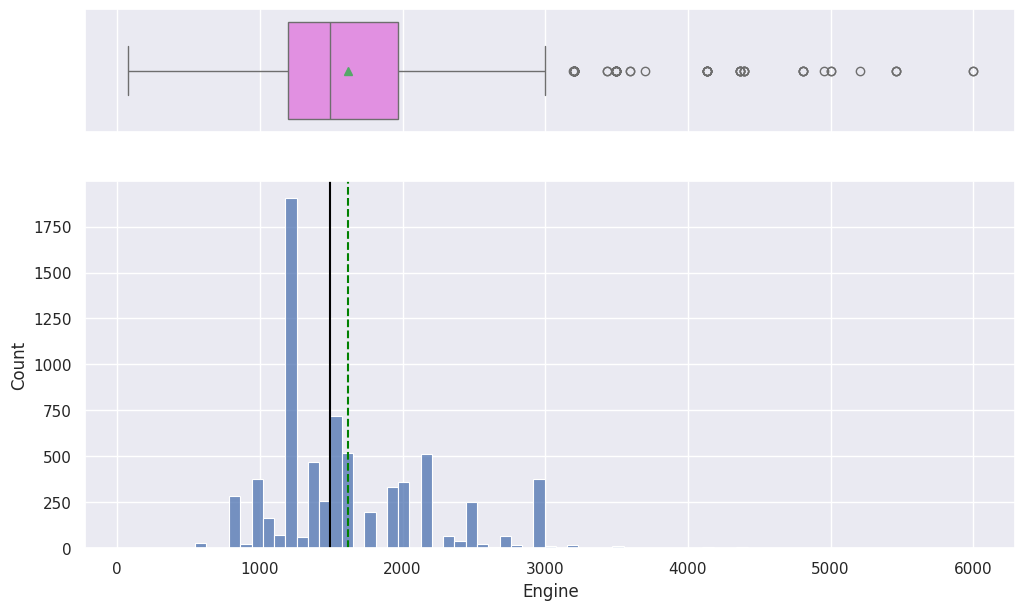

In [143]:
histogram_boxplot(df, "Engine")
# Function to check the skewness of a variable
skewness_value = df['Engine'].skew()

print("Skewness of 'Engine':", skewness_value)

There seems to be a really low value on Engine, like we saw before the min value was 72, this will be an outlier and we should drop it

In [144]:
df[df['Engine']< 624]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.0,8,10.819778


In [145]:
# Identify the row(s) with the outlier value(s)
outlier_rows_index1 = df[df['Engine'] == 72.0].index

# Drop the row(s) with outlier value(s)
df = df.drop(outlier_rows_index1)

Skewness of 'Engine': 1.416367613080639


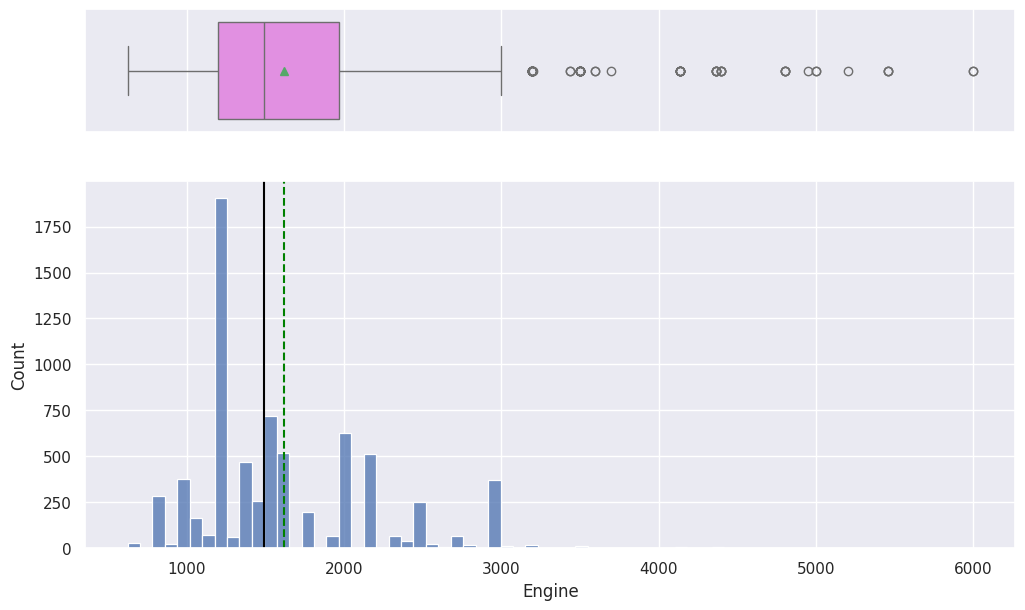

In [146]:
histogram_boxplot(df, "Engine")
# Function to check the skewness of a variable
skewness_value = df['Engine'].skew()

print("Skewness of 'Engine':", skewness_value)

**Observations:**
- There are some outliers on Engine from 4000 to 6000, these are the fastest cars that have a bigger engine

Skewness of 'Power': 1.9628094842273558


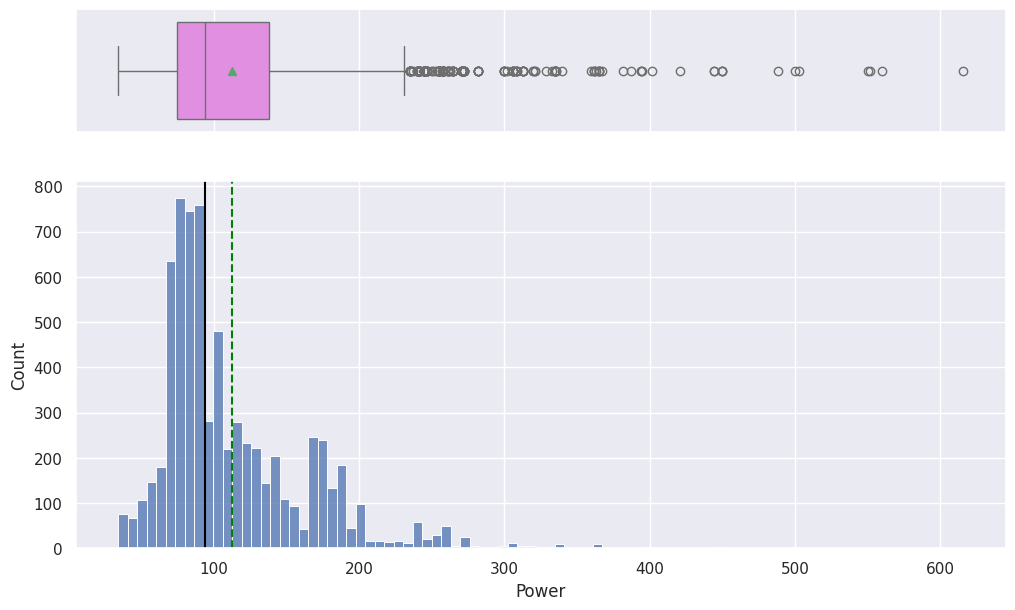

In [147]:
histogram_boxplot(df, "Power")
# Function to check the skewness of a variable
skewness_value = df['Power'].skew()

print("Skewness of 'Power':", skewness_value)

**Observations:**
- Similar to engine, the power increases the speed of the car, there are outliers from 400 to 600, those are the most powerfull cars on the dataset

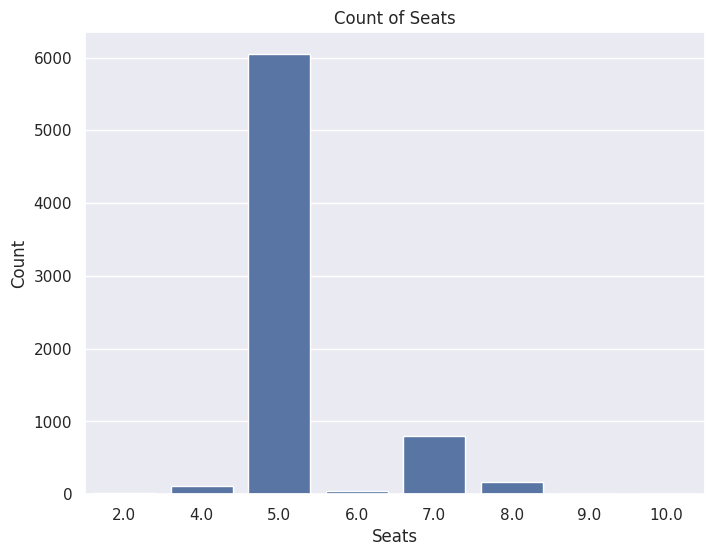

In [148]:
# Create the count plot for the 'Seats' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Seats', data=df)
plt.title('Count of Seats')
plt.xlabel('Seats')
plt.ylabel('Count')
plt.show()


Observations:
- Most of the cars have 5 seats, that is the standard, follow by 7, 8 and 4

Skewness of 'Price': 3.3375344605464328


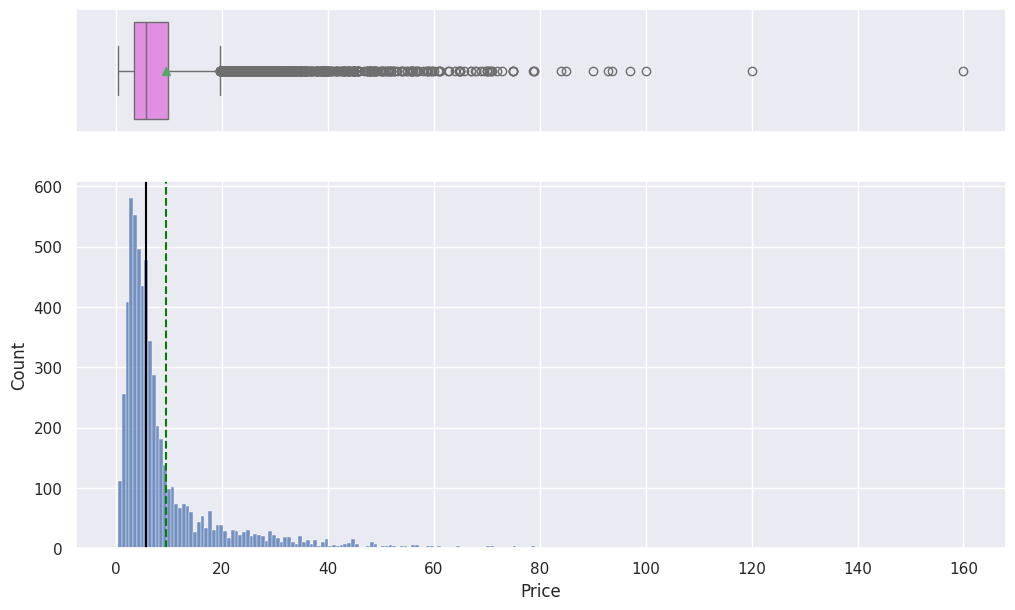

In [149]:
histogram_boxplot(df, "Price")
# Function to check the skewness of a variable
skewness_value = df['Price'].skew()

print("Skewness of 'Price':", skewness_value)

Price variable is right skewed, we will use the log function to transform it and reduce skewness

Skewness of 'Price_log': 0.4165780596946553


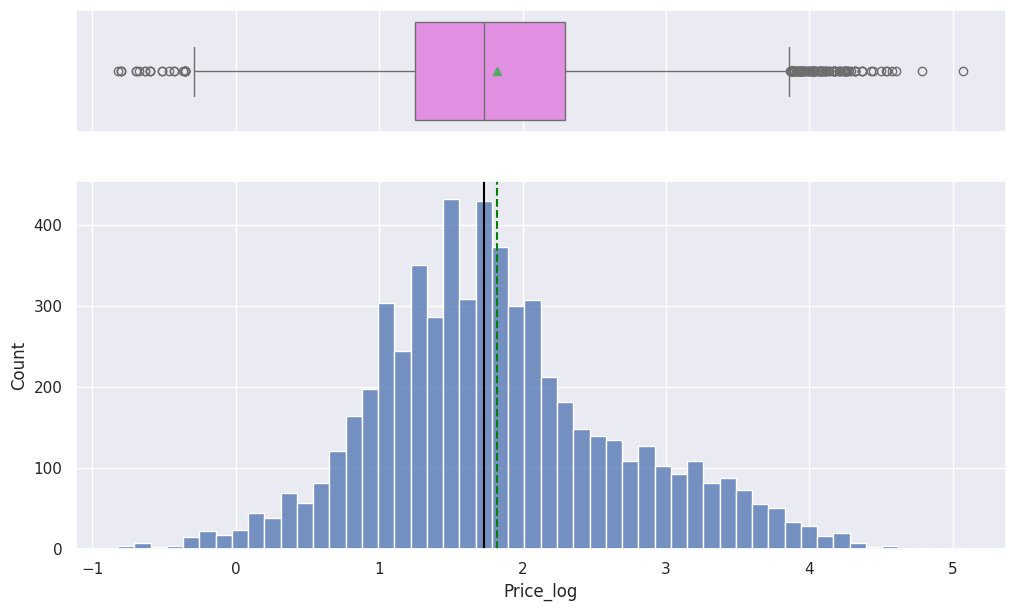

In [150]:
# Transform the feature 'Price' with the log function and add it to the dataframe
df["Price_log"] = np.log(df["Price"])

# Function to check the skewness of a variable
skewness_value = df['Price_log'].skew()

print("Skewness of 'Price_log':", skewness_value)

histogram_boxplot(df, "Price_log")

Observations:
- After applying the log function to the variable Price we were able to considerably reduce the skewness of the distribution

In [151]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

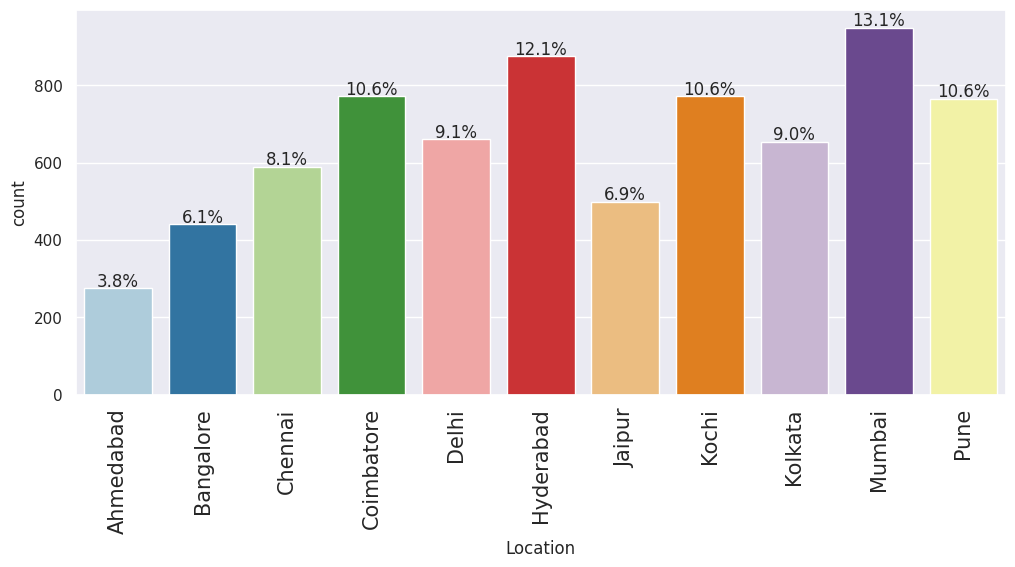

In [152]:
labeled_barplot(df, "Location", perc = True)

**Observations:**
- Top 3 locations with more cars sold are Mumbai, Hyderabad and Kochi
- The location with the least cars sold is Ahmedabad with only 3.8%

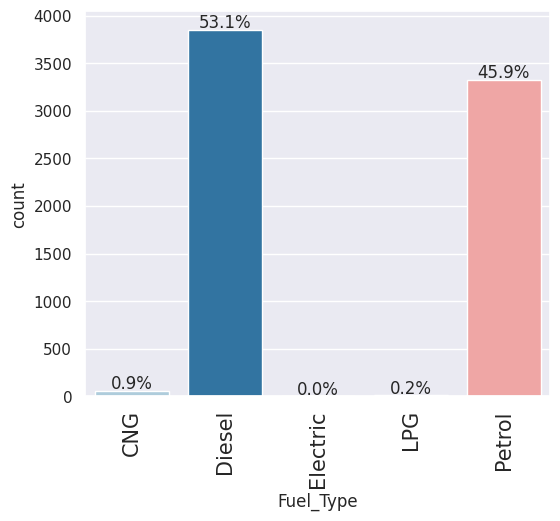

In [153]:
labeled_barplot(df, "Fuel_Type", perc = True)

**Observations:**
- Most cars sold take Diesel or Petrol
- CNG, Electric and LPG take less than 1% of the cars each, this means that there are only a few cars with these Fuel types

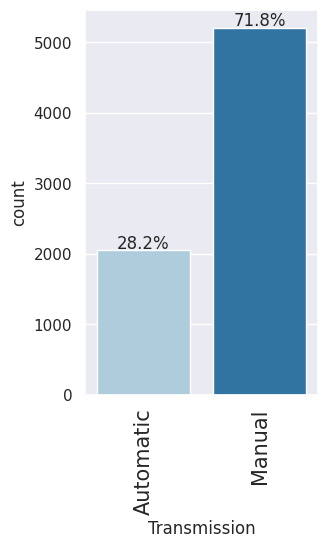

In [154]:
labeled_barplot(df, "Transmission", perc = True)

**Observations:**
- The majority of cars are Manual, accounting for 71.8%, while the rest are Automatic, making up 28.2%.

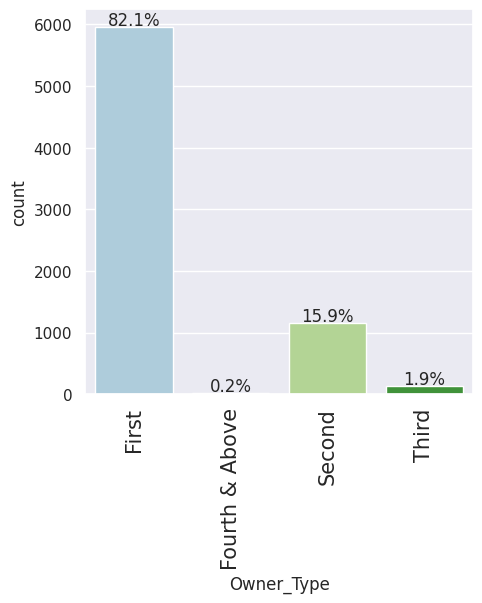

In [155]:
labeled_barplot(df, "Owner_Type", perc = True)

**Observations:**
- The majority of cars are First Owner with a 82.1%, followed by Second with 15.9%, Third with 1.9% and Fourth and Above with only 0.2%
- There are only a few cars with Fourth and above Owner type, these cars have had several owners over time

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

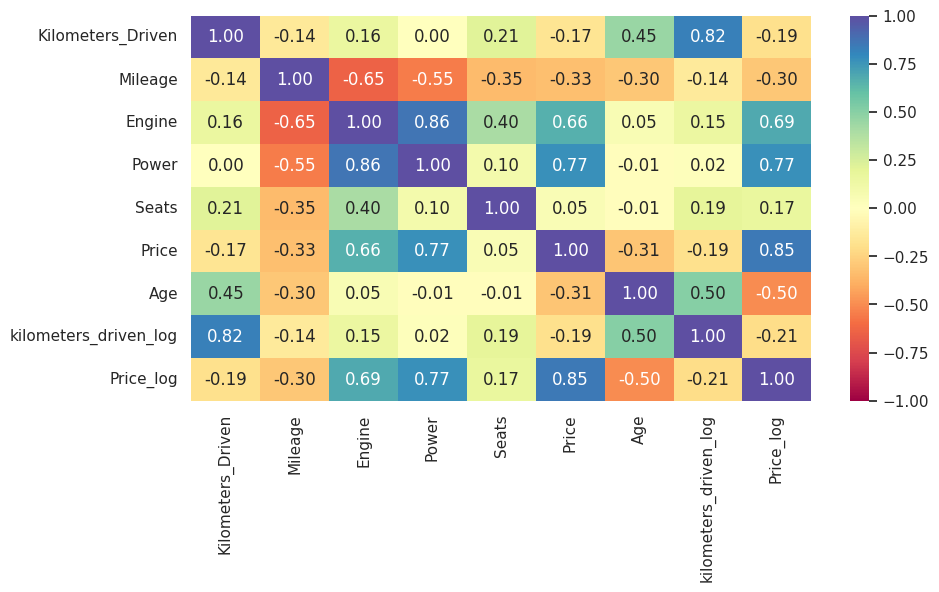

In [156]:
cols_list = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    df[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Observations:**
- There is a big positive correlation between Power and Engine of 0.86
- There is a big positive correlations between Price_log and Power of 0.77
- There is a positive correlation between Price_log and Engine of 0.69
- There is a negative correlation between Price_log and Age of -50
- There is a negative correlation between Price_log and Mileage of -0.30
- There is a positive correlation between Age and kilometers_driven_log of 0.50
- There is a negative correlation between Engine and Mileage of -0.65
- There is a negative correlation between Power and Mileage of -0.55





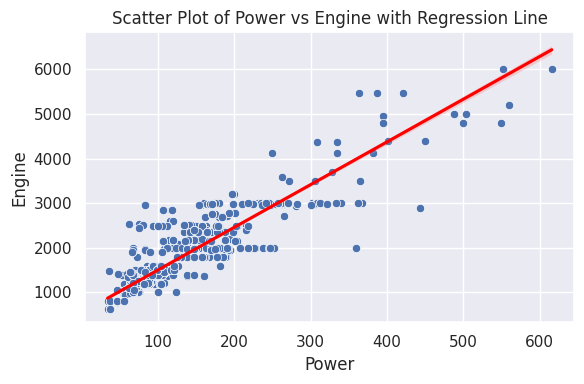

In [157]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Power', y='Engine', data=df)

# Add regression line
sns.regplot(x='Power', y='Engine', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Power vs Engine with Regression Line')
plt.xlabel('Power')
plt.ylabel('Engine')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**
- Engine cc and power appear to be positively correlated, which is logical as larger or higher-quality engines typically yield greater power output.


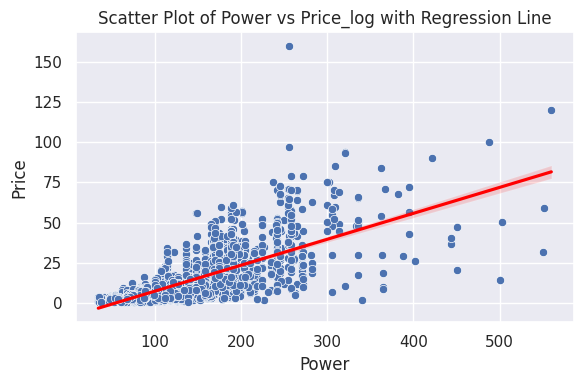

In [158]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Power', y='Price', data=df)

# Add regression line
sns.regplot(x='Power', y='Price', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Power vs Price_log with Regression Line')
plt.xlabel('Power')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**
- Price tends to rise in correlation with power; as the power of cars increases, so does their cost.

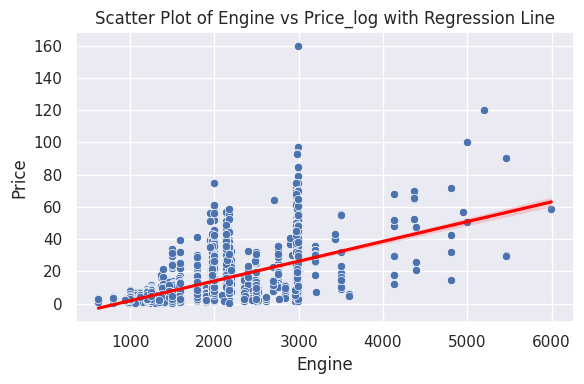

In [159]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Engine', y='Price', data=df)

# Add regression line
sns.regplot(x='Engine', y='Price', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Engine vs Price_log with Regression Line')
plt.xlabel('Engine')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**
- Similarly to power, the price tends to rise with larger and faster engines.

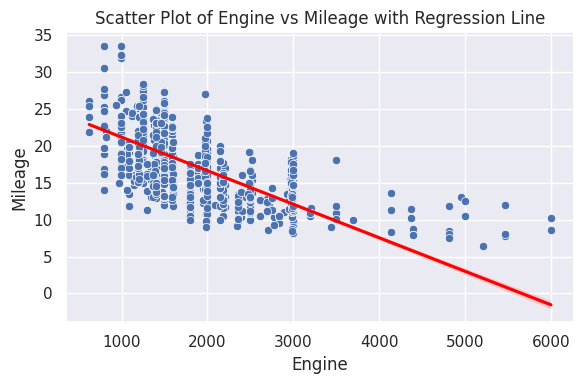

In [160]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Engine', y='Mileage', data=df)

# Add regression line
sns.regplot(x='Engine', y='Mileage', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Engine vs Mileage with Regression Line')
plt.xlabel('Engine')
plt.ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**
- The fuel efficiency appears to diminish in relation to the engine displacement; as engine CC increases, mileage tends to decrease accordingly

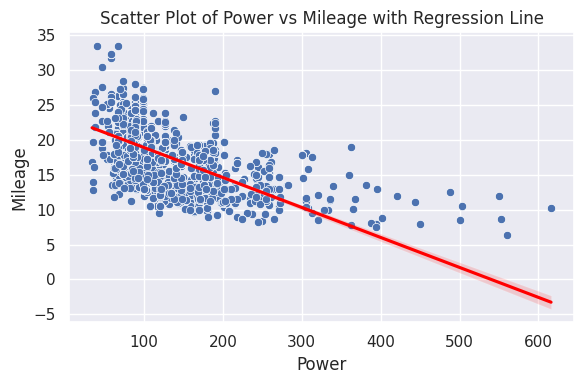

In [161]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Power', y='Mileage', data=df)

# Add regression line
sns.regplot(x='Power', y='Mileage', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Power vs Mileage with Regression Line')
plt.xlabel('Power')
plt.ylabel('Mileage')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**
- The fuel efficiency appears to diminish in relation to power; as power increases, mileage tends to decrease accordingly.

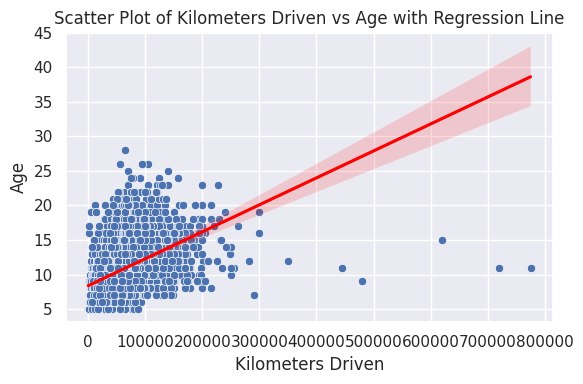

In [162]:
plt.figure(figsize=(6, 4))

# Create scatter plot
sns.scatterplot(x='Kilometers_Driven', y='Age', data=df)

# Add regression line
sns.regplot(x='Kilometers_Driven', y='Age', data=df, scatter=False, color='red')

# Set plot title and axis labels
plt.title('Scatter Plot of Kilometers Driven vs Age with Regression Line')
plt.xlabel('Kilometers Driven')
plt.ylabel('Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Observations:**

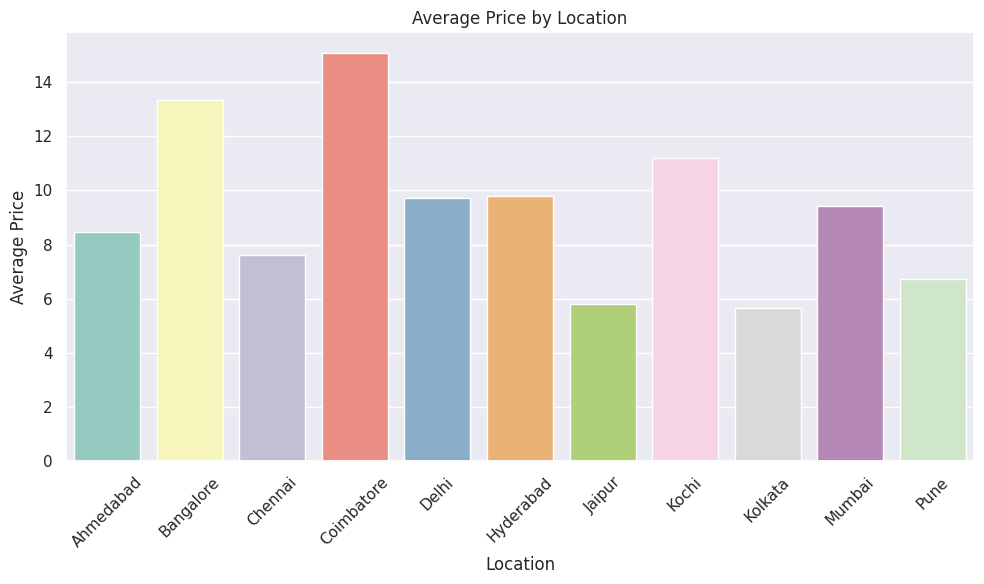

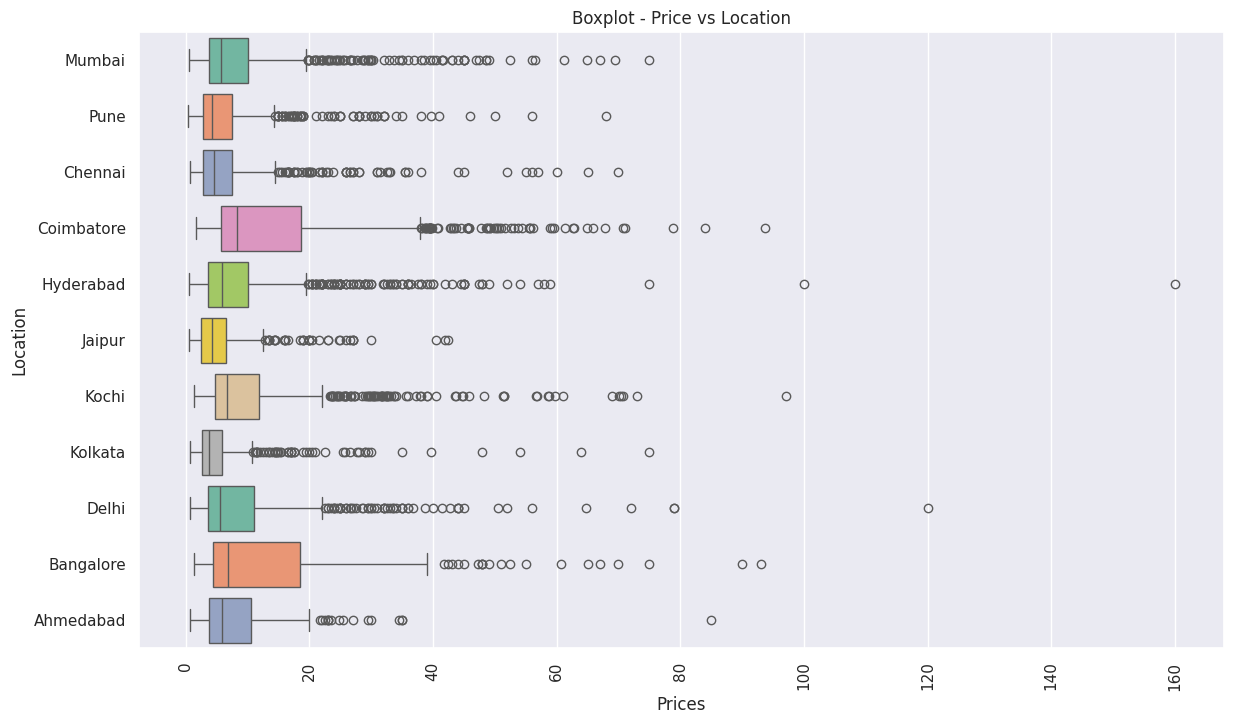

In [163]:
# Group data by "Location" and calculate the average price
df_avg_price_location = df.groupby("Location")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Location', y='Price', data=df_avg_price_location, palette='Set3')

# Set plot title and axis labels
plt.title('Average Price by Location')
plt.xlabel('Location')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

# Set figure size
plt.figure(figsize=[14, 8])

# Create box plot
sns.boxplot(data=df, x='Price', y='Location', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and axis labels
plt.title("Boxplot - Price vs Location")
plt.xlabel("Prices")
plt.ylabel("Location")

# Show plot
plt.show()

**Observations:**
- On average the city of Coimbatore has the most expensive cars and Jaipur has the cheapest ones
- There is an outlier in Hyderabad were we have the most expensive car of our dataset

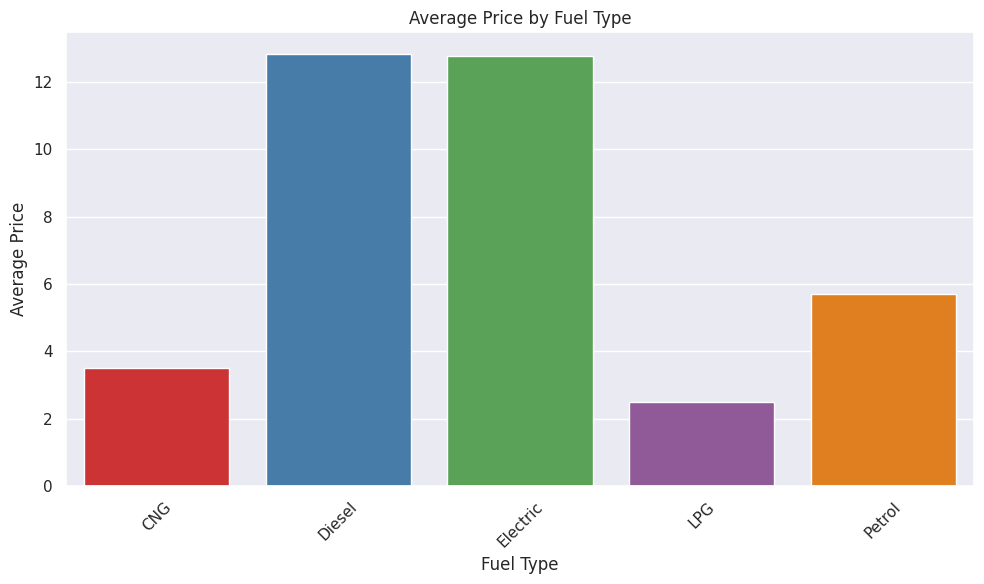

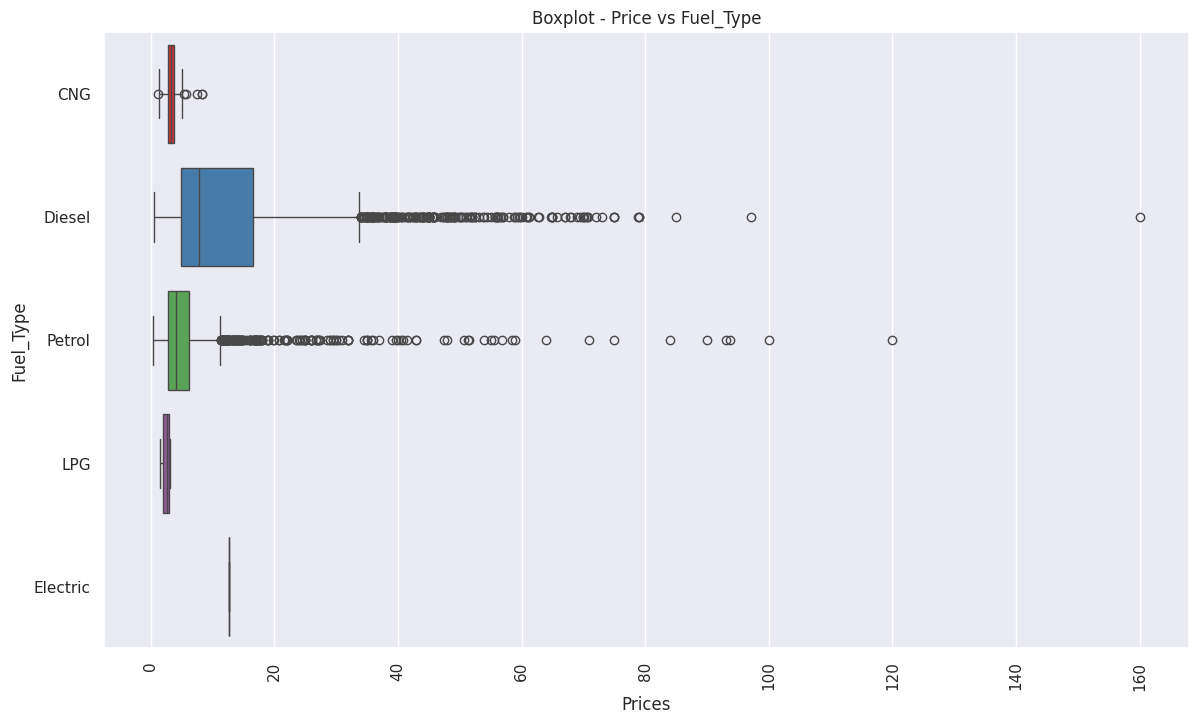

In [164]:
# Group data by "Fuel_Type" and calculate the average price
df_avg_price_fuel = df.groupby("Fuel_Type")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Fuel_Type', y='Price', data=df_avg_price_fuel, palette='Set1')

# Set plot title and axis labels
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

# Set figure size
plt.figure(figsize=[14, 8])

# Create box plot
sns.boxplot(data=df, x='Price', y='Fuel_Type', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and axis labels
plt.title("Boxplot - Price vs Fuel_Type")
plt.xlabel("Prices")
plt.ylabel("Fuel_Type")

# Show plot
plt.show()

In [165]:
# Filter the DataFrame for electric cars
df[df['Fuel_Type'] == 'Electric']




,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Price_log
4904,Toyota Prius 2009-2016 Z4,Mumbai,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,13,10.691945,2.545531


There is only 1 car that runs on Electric Fuel_Type, we will remove it from the dataset

In [166]:
# Drop rows where 'Fuel_Type' is equal to 'Electric'
df.drop(df[df['Fuel_Type'] == 'Electric'].index, inplace=True)

Now that we dropped the Electric Fuel type we can unify LPG and CNG for Gas since they both run on Gas Fuel

In [167]:
# Replace 'CNG' and 'LPG' with 'Gas'
df['Fuel_Type'].replace({'CNG': 'Gas', 'LPG': 'Gas'}, inplace=True)

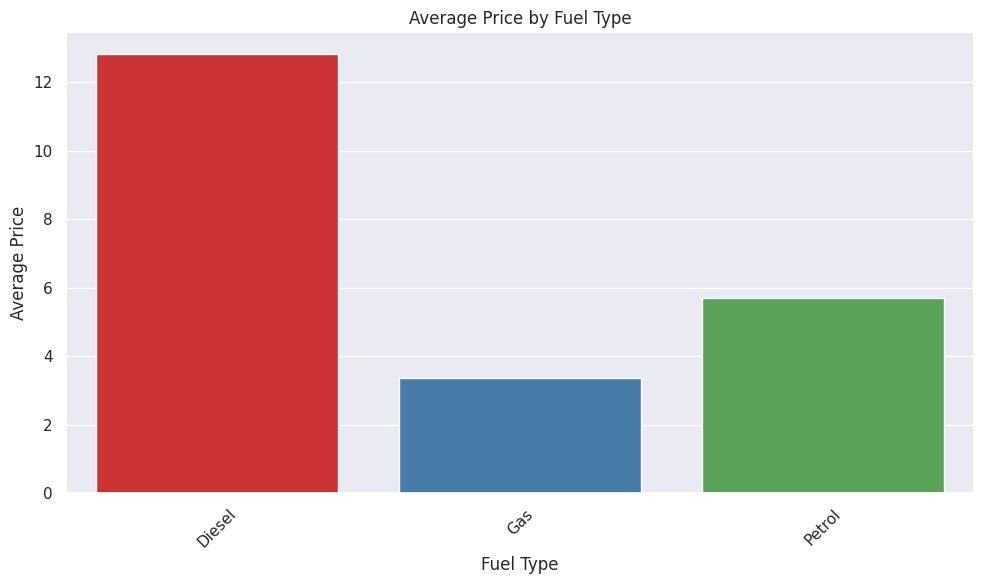

In [168]:
# Group data by "Fuel_Type" and calculate the average price
df_avg_price_fuel = df.groupby("Fuel_Type")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Fuel_Type', y='Price', data=df_avg_price_fuel, palette='Set1')

# Set plot title and axis labels
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

**Observations:**
- The average price of Electric cars is around 12 because there is only 1 electric car on the dataset, we removed it
- On average the most expensive cars run on Diesel, followed by Petrol
- The LPG and CNG cars are the least expensive, both under 4 in average price
- We transformed the Fuel_Type variable into only 3, Petrol, Diesel and Gas

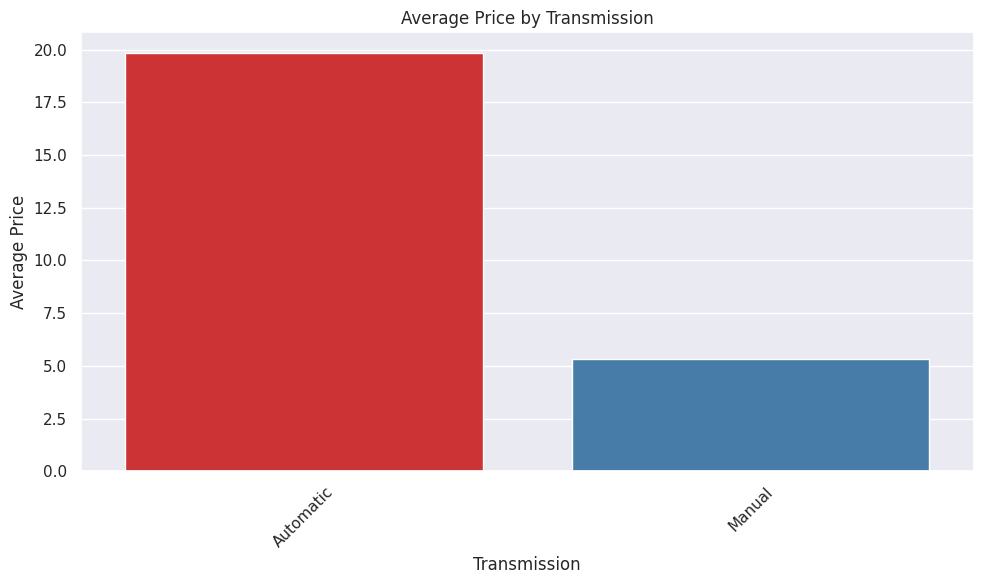

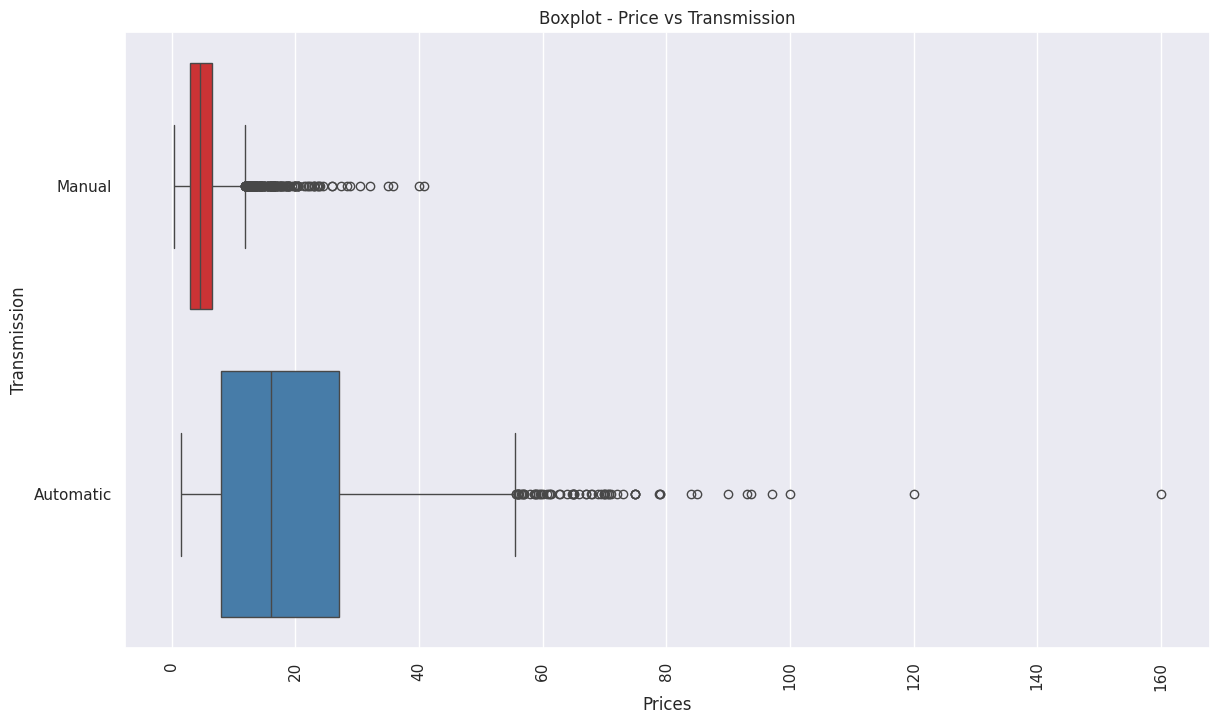

In [169]:
# Group data by "Transmission" and calculate the average price
df_avg_price_transmission = df.groupby("Transmission")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Transmission', y='Price', data=df_avg_price_transmission, palette='Set1')

# Set plot title and axis labels
plt.title('Average Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

# Set figure size
plt.figure(figsize=[14, 8])

# Create box plot
sns.boxplot(data=df, x='Price', y='Transmission', palette='Set1')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and axis labels
plt.title("Boxplot - Price vs Transmission")
plt.xlabel("Prices")
plt.ylabel("Transmission")

# Show plot
plt.show()

**Observations:**
- On average the Automatic cars are more expensive than Manuals


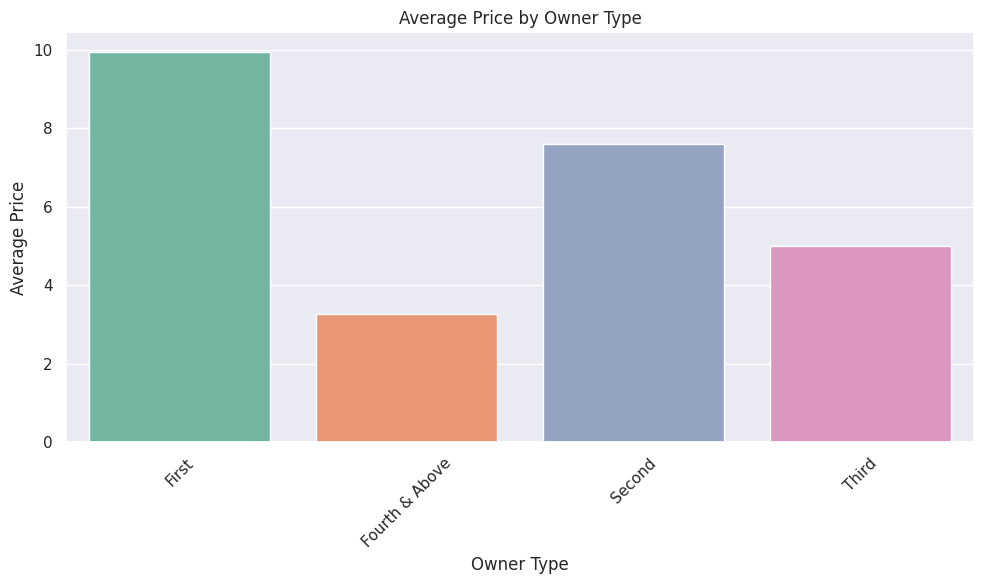

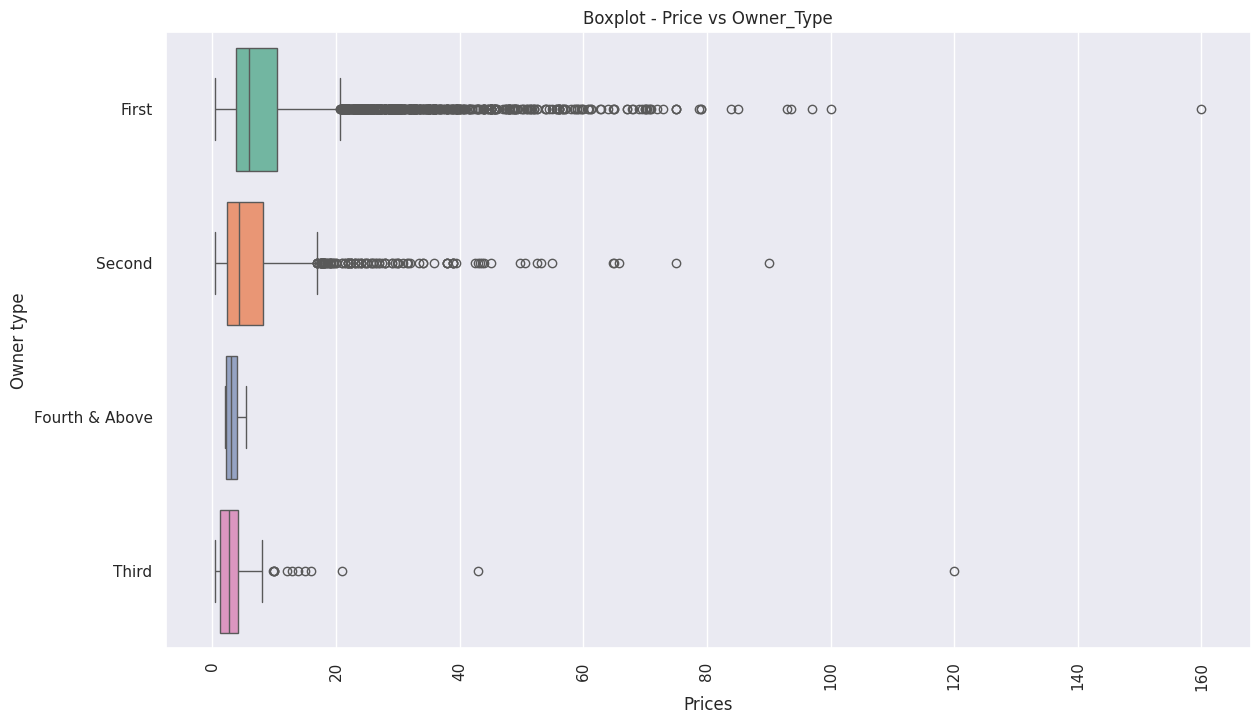

In [170]:
# Group data by "Owner_Type" and calculate the average price
df_avg_price_owner = df.groupby("Owner_Type")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Owner_Type', y='Price', data=df_avg_price_owner, palette='Set2')

# Set plot title and axis labels
plt.title('Average Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

# Set figure size
plt.figure(figsize=[14, 8])

# Create box plot
sns.boxplot(data=df, x='Price', y='Owner_Type', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and axis labels
plt.title("Boxplot - Price vs Owner_Type")
plt.xlabel("Prices")
plt.ylabel("Owner type")

# Show plot
plt.show()

The owner type Fourth & above and Third both have few values, we are going to merge them and create one variable called Third & above

In [171]:
# Replace 'Fourth & above' and 'Third' with 'Third & above'
df['Owner_Type'].replace({'Third': 'Third & Above', 'Fourth & Above': 'Third & Above'}, inplace=True)

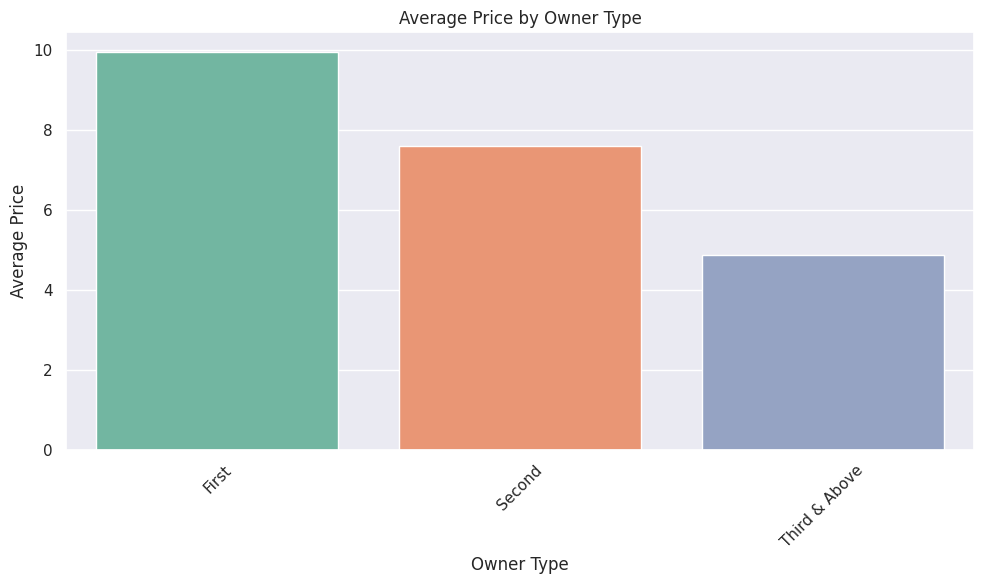

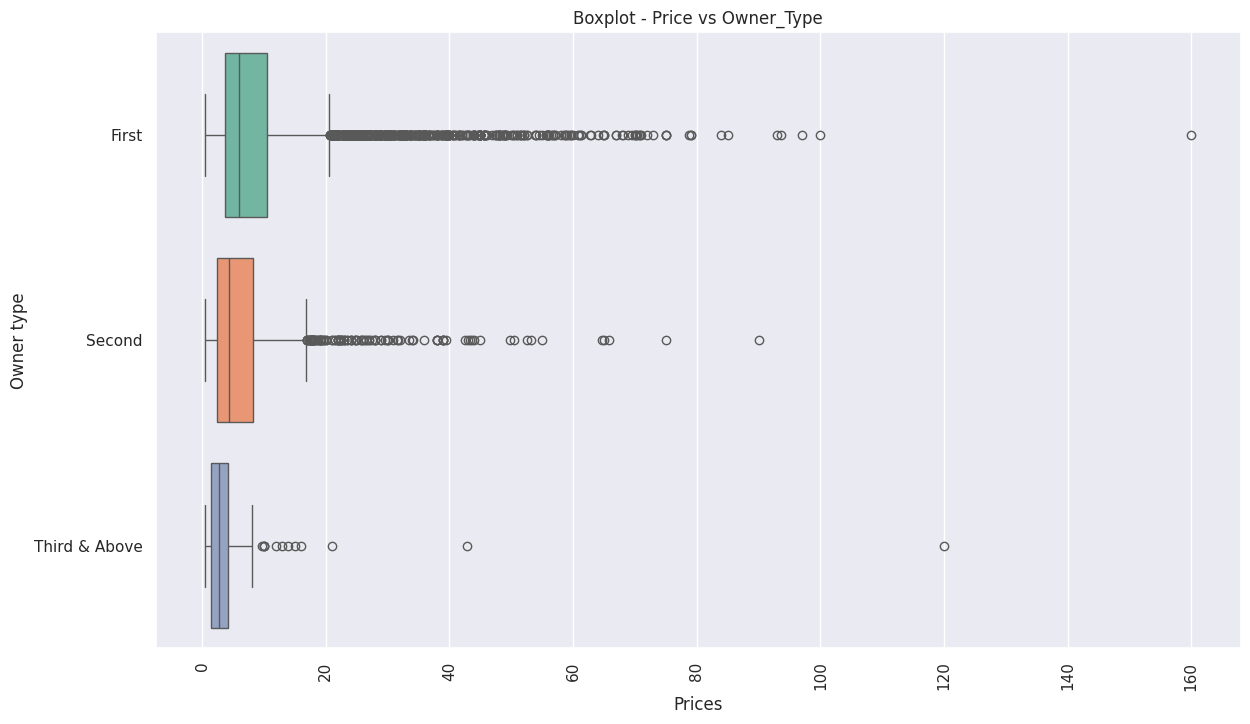

In [172]:
# Group data by "Owner_Type" and calculate the average price
df_avg_price_owner = df.groupby("Owner_Type")["Price"].mean().reset_index()

plt.figure(figsize=[10, 6])
plt.xticks(rotation=45)

# Create bar plot
bar_plot = sns.barplot(x='Owner_Type', y='Price', data=df_avg_price_owner, palette='Set2')

# Set plot title and axis labels
plt.title('Average Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')

# Show plot
plt.tight_layout()
plt.show()

# Set figure size
plt.figure(figsize=[14, 8])

# Create box plot
sns.boxplot(data=df, x='Price', y='Owner_Type', palette='Set2')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and axis labels
plt.title("Boxplot - Price vs Owner_Type")
plt.xlabel("Prices")
plt.ylabel("Owner type")

# Show plot
plt.show()

**Observations:**
- First owner cars are the most expensive in the market, followed by Second, Third and Fourth & Above, it makes sense the less owners the car has the more expensive tends to be

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [173]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df['Brand'].head()

0     maruti
1    hyundai
2      honda
3     maruti
4       audi
Name: Brand, dtype: object

In [174]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: ' '.join(x.split(" ")[1:]).lower())
df['Model'].head()

0               wagon r lxi cng
1      creta 1.6 crdi sx option
2                        jazz v
3                    ertiga vdi
4    a4 new 2.0 tdi multitronic
Name: Model, dtype: object

In [175]:
# Group Values by 'Brand' and apply aggregation function to display several values for Price concerning the Brand
brand_stats_price = df.groupby('Brand').agg({
    'Price': ['max', 'min', 'mean', 'median', 'count'],
    'Power': ['max', 'min', 'mean', 'median'],
    'Engine': ['max', 'min', 'mean', 'median'],
    'Mileage': ['max', 'min', 'mean', 'median'],
    })

# Sort values by highest mean price
brand_stats_price_sorted = brand_stats_price.sort_values(by = ('Power', 'max'), ascending=False)
brand_stats_price_sorted

Price                                      Power          \
                  max     min        mean   median count     max     min   
Brand                                                                      
bentley         59.00   59.00   59.000000   59.000     1  616.00  552.00   
lamborghini    120.00  120.00  120.000000  120.000     1  560.00  560.00   
porsche         75.00    2.02   48.348333   47.020    18  550.00  240.00   
jaguar         100.00   16.00   37.632250   31.900    40  503.00  177.00   
bmw             93.67    6.30   25.093684   21.000   266  450.00  143.00   
audi            72.94    7.50   25.537712   23.500   236  444.00  132.00   
mercedes-benz   90.00    3.90   26.809874   24.000   318  421.00  107.30   
ford            56.80    0.69    6.889400    5.345   300  395.00   67.00   
land           160.00   11.00   39.259500   35.000    60  335.30  115.00   
nissan           8.92    1.75    4.738352    4.300    91  328.50   63.10   
skoda           27.30    1.25    7.559075    6.000   173  262.60   66.00   
honda           17.50    0.90    5.411743    4.950   608  218.00   78.00   
volvo           32.50    7.25   18.802857   18.250    21  215.00  150.00   
mitsubishi      28.00    1.00   11.058889    9.950    27  199.30   68.00   
hyundai         23.00    0.45    5.343433    4.600  1107  198.25   55.00   
mini            39.75   17.00   26.896923   24.285    26  192.00  112.00   
volkswagen      24.90    2.10    5.307270    4.890   315  189.00   73.75   
mahindra        17.63    1.50    8.027638    7.570   271  184.00   62.10   
toyota          35.82    1.50   11.577171   10.750   410  178.40   67.04   
isuzu           20.00    8.00   14.696667   16.090     3  174.57  134.00   
jeep            23.91   15.00   18.718667   18.500    15  170.00  160.00   
chevrolet        9.87    0.75    3.044463    2.500   121  163.70   56.30   
maruti          11.50    0.45    4.517267    4.150  1211  163.50   34.20   
fiat             7.71    0.55    3.269286    2.600    28  160.00   67.00   
tata            17.85    0.44    3.562849    2.900   186  154.00   35.00   
renault         14.01    2.40    5.799034    5.490   145  148.00   53.30   
force           12.00    8.00    9.333333    8.000     3  139.07  139.01   
opelcorsa         NaN     NaN         NaN      NaN     0   88.00   88.00   
datsun           3.95    2.25    3.049231    3.100    13   67.06   53.00   
ambassador       1.35    1.35    1.350000    1.350     1   35.50   35.50   
hindustan         NaN     NaN         NaN      NaN     0     NaN     NaN   
smart            3.00    3.00    3.000000    3.000     1     NaN     NaN   

                                    Engine                               \
                     mean   median     max     min         mean  median   
Brand                                                                     
bentley        584.000000  584.000  5998.0  5998.0  5998.000000  5998.0   
lamborghini    560.000000  560.000  5204.0  5204.0  5204.000000  5204.0   
porsche        325.917647  300.000  4806.0  2706.0  3452.684211  2967.0   
jaguar         236.216458  212.550  5000.0  1997.0  2571.750000  2179.0   
bmw            210.573322  190.000  4395.0  1995.0  2328.424342  1995.0   
audi           189.340246  174.330  4134.0  1395.0  2245.452632  1968.0   
mercedes-benz  193.620820  186.000  5461.0  1595.0  2356.773684  2143.0   
ford            96.364490   89.840  4951.0   999.0  1583.575499  1498.0   
land           188.745937  187.700  4367.0  1999.0  2468.703125  2179.0   
nissan          89.702478   84.800  3696.0  1198.0  1492.837607  1461.0   
skoda          126.622750  108.495  3597.0  1198.0  1782.089552  1798.0   
honda          108.450707   98.600  2997.0  1198.0  1503.194030  1497.0   
volvo          188.464286  190.000  2400.0  1969.0  2175.607143  1985.0   
mitsubishi     145.193333  172.780  3200.0  1468.0  2542.027778  2477.0   
hyundai         92.152134   82.000  2359.0   814.0  1306.604354  1197.0   
mini 

In [176]:
# Filter the DataFrame for smart Brand
df[df['Brand'] == 'smart']

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Price_log,Brand,Model
915,Smart Fortwo CDI AT,Pune,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3.0,16,11.542484,1.098612,smart,fortwo cdi at


In [177]:
# Drop rows where 'Brand' is equal to 'smart'
df.drop(df[df['Brand'] == 'smart'].index, inplace=True)


**Observations:**
- The Smart brand is the only brand that has missing values on most of the columns, and since its only one car, we will drop it.

### **Missing value treatment**

**Missing values of Seats**

In [178]:
# We get the first 5 datapoints were the seats variable is null
df[df['Seats'].isnull()].head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,2.95,17,11.002200,1.081805,honda,city 1.5 gxi
208,Maruti Swift 1.3 VXi,Kolkata,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,2.11,14,10.645449,0.746688,maruti,swift 1.3 vxi
229,Ford Figo Diesel,Bangalore,70436,Diesel,Manual,First,NaN,1498.0,99.0,NaN,3.60,9,11.162460,1.280934,ford,figo diesel
733,Maruti Swift 1.3 VXi,Chennai,97800,Petrol,Manual,Third & Above,16.1,NaN,NaN,NaN,1.75,18,11.490680,0.559616,maruti,swift 1.3 vxi
749,Land Rover Range Rover 3.0 D,Mumbai,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,26.50,16,10.915107,3.277145,land,rover range rover 3.0 d


In [179]:
# We print the data points were the model is equal to the one with the missing value on seat and we also compute de median for both Model and Brand
print(df[df['Brand'] == 'honda']['Seats'].median())
print(df[df['Model'] == 'city 1.5 gxi']['Seats'].median())
df[df['Model'] == 'city 1.5 gxi']

5.0
5.0


,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age,kilometers_driven_log,Price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,2.95,17,11.002200,1.081805,honda,city 1.5 gxi
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,1.50,20,11.652687,0.405465,honda,city 1.5 gxi
3305,Honda City 1.5 GXI,Jaipur,75055,Petrol,Manual,First,12.8,1493.0,100.0,5.0,2.30,17,11.225976,0.832909,honda,city 1.5 gxi
4767,Honda City 1.5 GXI,Mumbai,81000,Petrol,Manual,Second,12.8,1493.0,100.0,5.0,1.10,19,11.302204,0.095310,honda,city 1.5 gxi
5270,Honda City 1.5 GXI,Bangalore,53000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,1.85,22,10.878047,0.615186,honda,city 1.5 gxi


Reviewing the data we can see we can get the number of seats of the cars using their brand and model, computing the median

In [180]:
# Calculate the median seats for each model
median_seats_by_model = df.groupby('Model')['Seats'].transform('median')

# Fill null values in 'Seats' column with corresponding median seats by model
df['Seats'] = df['Seats'].fillna(median_seats_by_model)

print('Null values with using model ',df['Seats'].isnull().sum())
# Calculate the median seats for each brand
median_seats_by_brand = df.groupby('Brand')['Seats'].transform('median')

# Fill remaining null values in 'Seats' column with corresponding median seats by brand
df['Seats'] = df['Seats'].fillna(median_seats_by_brand)

print('Null values with using model and brand ',df['Seats'].isnull().sum())

df['Seats'].value_counts()

Null values with using model  46
Null values with using model and brand  0


5.0     6096
7.0      798
8.0      170
4.0      119
6.0       38
2.0       17
10.0       8
9.0        3
Name: Seats, dtype: int64

**Missing values of Mileage**

In [181]:
df['Mileage'].isnull().sum()

80

In [182]:
# Calculate the median of power for each model
median_power_by_mileage = df.groupby('Model')['Mileage'].transform('median')

# Fill null values in 'Power' column with corresponding median power by model
df['Mileage'] = df['Mileage'].fillna(median_power_by_mileage)

print('Null values with using model ',df['Mileage'].isnull().sum())

# Calculate the median power for each brand
median_power_by_mileage = df.groupby('Brand')['Mileage'].transform('median')

# Fill remaining null values in 'Power' column with corresponding median power by brand
df['Mileage'] = df['Mileage'].fillna(median_power_by_mileage)

print('Null values with using model and brand ',df['Mileage'].isnull().sum())

Null values with using model  77
Null values with using model and brand  0


In [183]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())
df['Mileage'].isnull().sum()

0

**Missing values of Engine**

In [184]:
df['Engine'].isnull().sum()

46

In [185]:
# Calculate the median of engine for each model
median_engine_by_model = df.groupby('Model')['Engine'].transform('median')

# Fill null values in 'Engine' column with corresponding median engine by model
df['Engine'] = df['Engine'].fillna(median_engine_by_model)

print('Null values with using model ',df['Engine'].isnull().sum())

# Calculate the median seats for each brand
median_engine_by_brand = df.groupby('Brand')['Engine'].transform('median')

# Fill remaining null values in 'Seats' column with corresponding median seats by brand
df['Engine'] = df['Engine'].fillna(median_engine_by_brand)

print('Null values with using model and brand ',df['Engine'].isnull().sum())

Null values with using model  40
Null values with using model and brand  0


**Missing values of Power**

In [186]:
# Calculate the median of power for each model
median_power_by_model = df.groupby('Model')['Power'].transform('median')

# Fill null values in 'Power' column with corresponding median power by model
df['Power'] = df['Power'].fillna(median_power_by_model)

print('Null values with using model ',df['Power'].isnull().sum())

# Calculate the median power for each brand
median_power_by_brand = df.groupby('Brand')['Power'].transform('median')

# Fill remaining null values in 'Power' column with corresponding median power by brand
df['Power'] = df['Power'].fillna(median_power_by_brand)

print('Null values with using model and brand ',df['Power'].isnull().sum())

Null values with using model  135
Null values with using model and brand  1


In [187]:
df.groupby('Brand')['Power'].median()

Brand
ambassador        35.500
audi             174.330
bentley          584.000
bmw              190.000
chevrolet         79.400
datsun            67.000
fiat              90.600
force            139.010
ford              89.840
hindustan            NaN
honda             98.600
hyundai           82.000
isuzu            134.000
jaguar           212.550
jeep             170.000
lamborghini      560.000
land             187.700
mahindra         120.000
maruti            74.000
mercedes-benz    186.000
mini             113.980
mitsubishi       172.780
nissan            84.800
opelcorsa         88.000
porsche          300.000
renault           83.800
skoda            108.495
tata              74.000
toyota           125.000
volkswagen       103.200
volvo            190.000
Name: Power, dtype: float64

We still have 2 missing values, this is because 2 of the Brands don't have any information in Power, in this case we will fill these values with the overall median of Power

In [188]:
df['Power'] = df['Power'].fillna(df['Power'].median())
df['Power'].isnull().sum()

0

**Missing values of Price**

In [189]:
df['Price'].isnull().sum()

1234

We will drop the rows that have null values in price

In [190]:
df.dropna(subset=['Price'], inplace=True)
df['Price'].isnull().sum()

0

In [191]:
df.isnull().sum()

Name                     0
Location                 0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
Age                      0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

R/ We dropped name because we transformed it into 2 variables (Brand and Model), we don't need Price because we transformed it using Log, Price_log is the label variable and Kilometers_Driven was also transformed with Log

In [192]:
# We drop the Name column since we will use the Brand and Model
df.drop(columns=['Name'], inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6015 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6015 non-null   object 
 1   Kilometers_Driven      6015 non-null   int64  
 2   Fuel_Type              6015 non-null   object 
 3   Transmission           6015 non-null   object 
 4   Owner_Type             6015 non-null   object 
 5   Mileage                6015 non-null   float64
 6   Engine                 6015 non-null   float64
 7   Power                  6015 non-null   float64
 8   Seats                  6015 non-null   float64
 9   Price                  6015 non-null   float64
 10  Age                    6015 non-null   int64  
 11  kilometers_driven_log  6015 non-null   float64
 12  Price_log              6015 non-null   float64
 13  Brand                  6015 non-null   object 
 14  Model                  6015 non-null   object 
dtypes: f

In [194]:
# Separating features and the target column
X = df.drop(['Price','Price_log','Kilometers_Driven','Model'], axis = 1)
y = df["Price_log"]

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object"]).columns.tolist(),
        drop_first=True,
    )
    return x

#create dummy variable
X = encode_cat_vars(X)
X.head()



,Mileage,Engine,Power,Seats,Age,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
0,26.60,998.0,58.16,5.0,14,11.184421,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19.67,1582.0,126.20,5.0,9,10.621327,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.20,1199.0,88.70,5.0,13,10.736397,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.77,1248.0,88.76,7.0,12,11.373663,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.20,1968.0,140.80,5.0,11,10.613246,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:

X = sm.add_constant(X)

# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

print(X_train.shape, X_test.shape)

X_train.head()

(4210, 50) (1805, 50)


,const,Mileage,Engine,Power,Seats,Age,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo
3647,1.0,25.40,1186.0,73.97,5.0,7,11.010399,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1519,1.0,28.40,1248.0,73.75,5.0,7,10.247999,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,1.0,17.24,1198.0,73.90,5.0,14,11.160385,0,0,0,...,0,0,0,0,0,0,0,0,1,0
685,1.0,21.10,1248.0,73.90,5.0,12,11.896990,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5665,1.0,18.90,1197.0,82.00,5.0,9,10.878047,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Check Multicollinearity**

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

                     feature          VIF
0                      const  4852.704815
1                    Mileage     3.760288
2                     Engine    11.411330
3                      Power    10.449691
4                      Seats     2.525868
5                        Age     2.217389
6      kilometers_driven_log     1.779264
7         Location_Bangalore     2.577447
8           Location_Chennai     2.994913
9        Location_Coimbatore     3.516870
10            Location_Delhi     3.203720
11        Location_Hyderabad     3.887916
12           Location_Jaipur     2.739287
13            Location_Kochi     3.573224
14          Location_Kolkata     3.214643
15           Location_Mumbai     4.103561
16             Location_Pune     3.361157
17             Fuel_Type_Gas     1.062962
18          Fuel_Type_Petrol     2.761364
19       Transmission_Manual     2.310256
20         Owner_Type_Second     1.196037
21  Owner_Type_Third & Above     1.153852
22                Brand_audi   168

Since there are several Fuel types and Brand with a high multicolinearity when are going to drop all the dummy variables of these 2 features

In [197]:
# List of columns to drop
columns_to_drop = [col for col in X.columns if col.startswith('Brand_')]

# Drop the columns from the DataFrame
X = X.drop(columns_to_drop, axis=1)


In [198]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

In [199]:
print(checking_vif(X_train))

                     feature         VIF
0                      const  649.556031
1                    Mileage    3.178992
2                     Engine    9.010212
3                      Power    6.972904
4                      Seats    1.875157
5                        Age    2.097422
6      kilometers_driven_log    1.717414
7         Location_Bangalore    2.560581
8           Location_Chennai    2.967752
9        Location_Coimbatore    3.490219
10            Location_Delhi    3.179710
11        Location_Hyderabad    3.855228
12           Location_Jaipur    2.712814
13            Location_Kochi    3.554419
14          Location_Kolkata    3.195581
15           Location_Mumbai    4.069446
16             Location_Pune    3.338461
17             Fuel_Type_Gas    1.044174
18          Fuel_Type_Petrol    2.180145
19       Transmission_Manual    1.859089
20         Owner_Type_Second    1.183608
21  Owner_Type_Third & Above    1.123326


Engine and Power have a high VIF score, we will drop Engine and check again

In [200]:
X = X.drop(['Engine'], axis = 1)

In [201]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

In [202]:
print(checking_vif(X_train))

                     feature         VIF
0                      const  638.481380
1                    Mileage    2.659179
2                      Power    2.617355
3                      Seats    1.611474
4                        Age    2.094476
5      kilometers_driven_log    1.716850
6         Location_Bangalore    2.560469
7           Location_Chennai    2.966227
8        Location_Coimbatore    3.488869
9             Location_Delhi    3.178846
10        Location_Hyderabad    3.852448
11           Location_Jaipur    2.712621
12            Location_Kochi    3.553221
13          Location_Kolkata    3.193714
14           Location_Mumbai    4.069376
15             Location_Pune    3.337793
16             Fuel_Type_Gas    1.043342
17          Fuel_Type_Petrol    1.786550
18       Transmission_Manual    1.844627
19         Owner_Type_Second    1.183540
20  Owner_Type_Third & Above    1.123251


All the VIF scores are acceptable below 5, this means there is no multicolinearity

In [203]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [204]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4210, 21) (4210,) (1805, 21) (1805,)


In [205]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)


In [206]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

In [207]:
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1592.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:09:01   Log-Likelihood:                -918.50
No. Observations:                4210   AIC:                             1879.
Df Residuals:                    4189   BIC:                             2012.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.7282      0.117     31.730      0.000       3.498       3.959
Mileage                     -0.0245      0.002    -13.294      0.000      -0.028      -0.021
Power                        0.0083      0.000     59.845      0.000       0.008       0.009
Seats                        0.0205      0.007      2.786      0.005       0.006       0.035
Age                         -0.1141      0.002    -56.067      0.000      -0.118      -0.110
kilometers_driven_log       -0.0795      0.008     -9.415      0.000      -0.096      -0.063
Location_Bangalore           0.1508      0.031      4.914      0.000       0.091       0.211
Location_Chennai            -0.0017      0.029     -0.058      0.954      -0.059       0.056
Location_Coimbatore          0.0910      0.029      3.193      0.001       0.035       0.147
Location_Delhi              -0.0524      0.029     -1.825      0.068      -0.109       0.004
Location_Hyderabad           0.1143      0.028      4.145      0.000       0.060       0.168
Location_Jaipur             -0.0981      0.030     -3.270      0.001      -0.157      -0.039
Location_Kochi              -0.0359      0.028     -1.264      0.206      -0.091       0.020
Location_Kolkata            -0.2523      0.029     -8.720      0.000      -0.309      -0.196
Location_Mumbai             -0.0596      0.028     -2.160      0.031      -0.114      -0.006
Location_Pune               -0.0666      0.029     -2.325      0.020      -0.123      -0.010
Fuel_Type_Gas               -0.2245      0.048     -4.698      0.000      -0.318      -0.131
Fuel_Type_Petrol            -0.3898      0.012    -31.233      0.000      -0.414      -0.365
Transmission_Manual         -0.2975      0.014    -21.323      0.000      -0.325      -0.270
Owner_Type_Second           -0.0774      0.014     -5.648      0.000      -0.104      -0.051
Owner_Type_Third & Above    -0.1199      0.034     -3.556      0.000      -0.186      -0.054
==============================================================================
Omnibus:                     1060.433   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13966.999
Skew:                          -0.827   Prob(JB):                         0.00
Kurtosis:                      11.769   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
# Checking model1 performance
model_pref(model1, X_train, X_test)


    Data      RMSE       MAE        r2
0  Train  0.300963  0.221610  0.868474
1   Test  0.282190  0.216493  0.873318


**Observations:**
- The model has a good performance but we have some variables that are insignificant to the model and we will have to drop based on the p-value > 0.05


###  **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [209]:
# List of columns to drop
columns_to_drop = [col for col in X.columns if col.startswith('Location_')]


# Drop the columns from the DataFrame
X = X.drop(columns_to_drop, axis=1)
X = sm.add_constant(X)



In [210]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

In [211]:
# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_log   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2811.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:09:01   Log-Likelihood:                -1153.3
No. Observations:                4210   AIC:                             2329.
Df Residuals:                    4199   BIC:                             2398.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.5485      0.119     29.734      0.000       3.314       3.782
Mileage                     -0.0261      0.002    -13.423      0.000      -0.030      -0.022
Power                        0.0083      0.000     56.650      0.000       0.008       0.009
Seats                        0.0183      0.008      2.364      0.018       0.003       0.034
Age                         -0.1196      0.002    -59.063      0.000      -0.124      -0.116
kilometers_driven_log       -0.0534      0.009     -6.211      0.000      -0.070      -0.037
Fuel_Type_Gas               -0.2293      0.050     -4.569      0.000      -0.328      -0.131
Fuel_Type_Petrol            -0.4030      0.013    -30.938      0.000      -0.429      -0.377
Transmission_Manual         -0.3195      0.015    -21.794      0.000      -0.348      -0.291
Owner_Type_Second           -0.0614      0.014     -4.341      0.000      -0.089      -0.034
Owner_Type_Third & Above    -0.1072      0.035     -3.052      0.002      -0.176      -0.038
==============================================================================
Omnibus:                      930.502   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9569.559
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                      10.230   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [212]:
# Checking model1 performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  0.318229  0.238871  0.850631
1   Test  0.293853  0.228680  0.861410


**Observations:**
- The model has an R2 of 0.87 and all the variables have a p value lower than 0.05

In [213]:
from sklearn.linear_model import Ridge, Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit Ridge Regression model
ridge = Ridge(alpha=0.5)  # alpha is the regularization parameter
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
print(f"Ridge Regression - Train set R^2: {ridge_train_score:.3f}, Test set R^2: {ridge_test_score:.3f}")

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
print(f"Lasso Regression - Train set R^2: {lasso_train_score:.3f}, Test set R^2: {lasso_test_score:.3f}")

Ridge Regression - Train set R^2: 0.871, Test set R^2: 0.882
Lasso Regression - Train set R^2: 0.815, Test set R^2: 0.837


In [214]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}, Test set R^2: {ridge_cv.score(X_test, y_test):.3f}")

# Lasso Regression with hyperparameter tuning
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}, Test set R^2: {lasso_cv.score(X_test, y_test):.3f}")

Best Ridge alpha: 1.0, Test set R^2: 0.882
Best Lasso alpha: 0.001, Test set R^2: 0.882


### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [215]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.870 (+/- 0.030)
Mean Squared Error: 0.101 (+/- 0.025)


**Observation:**
- After applying cross-validation the model score improved to an R2 of 0.87

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [216]:
residuals = model2.resid

np.mean(residuals)

-2.5103171059410427e-15

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [217]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [218]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 1.0991214930557243), ('p-value', 0.010389988266947797)]

**Observation:**

- Since p-value < 0.05, we reject the Null Hypothesis that the residuals are homoscedastic.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

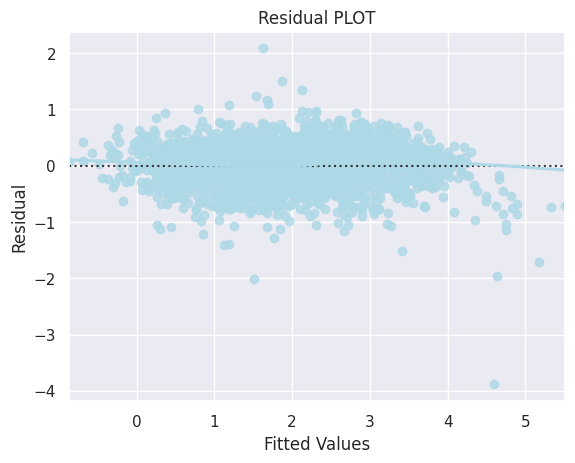

In [219]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Residuals are fairly randomly distributed, so that meets the regression assumption

### **4. Normality of error terms**

The residuals should be normally distributed.

Shapiro-Wilk Test:
Statistic: 0.9631955027580261, p-value: 1.8370764422984106e-31
Kolmogorov-Smirnov Test:
Statistic: 0.27367258083535684, p-value: 4.029510756920882e-279


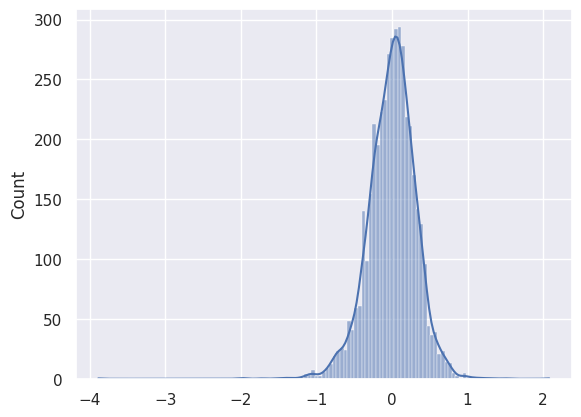

In [220]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')

# Kolmogorov-Smirnov test
stat, p = kstest(residuals, 'norm')
print('Kolmogorov-Smirnov Test:')
print(f'Statistic: {stat}, p-value: {p}')


Acording to the tests done on the residuals of the model doesn't quite follow a normal distribution.

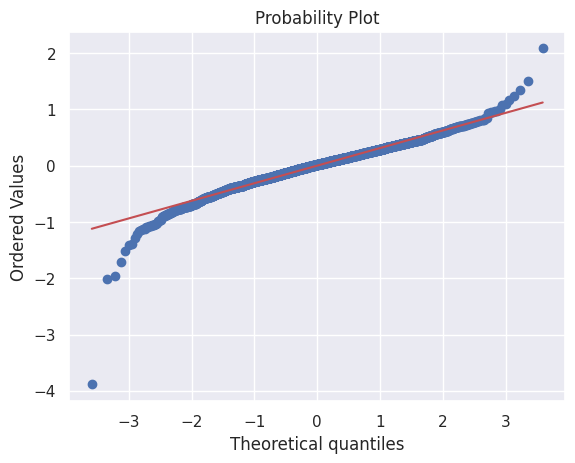

In [221]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Hyperparameter Tuning: Decision Tree**

In [222]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [223]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.333267,0.228394,0.843401,0.841955,inf


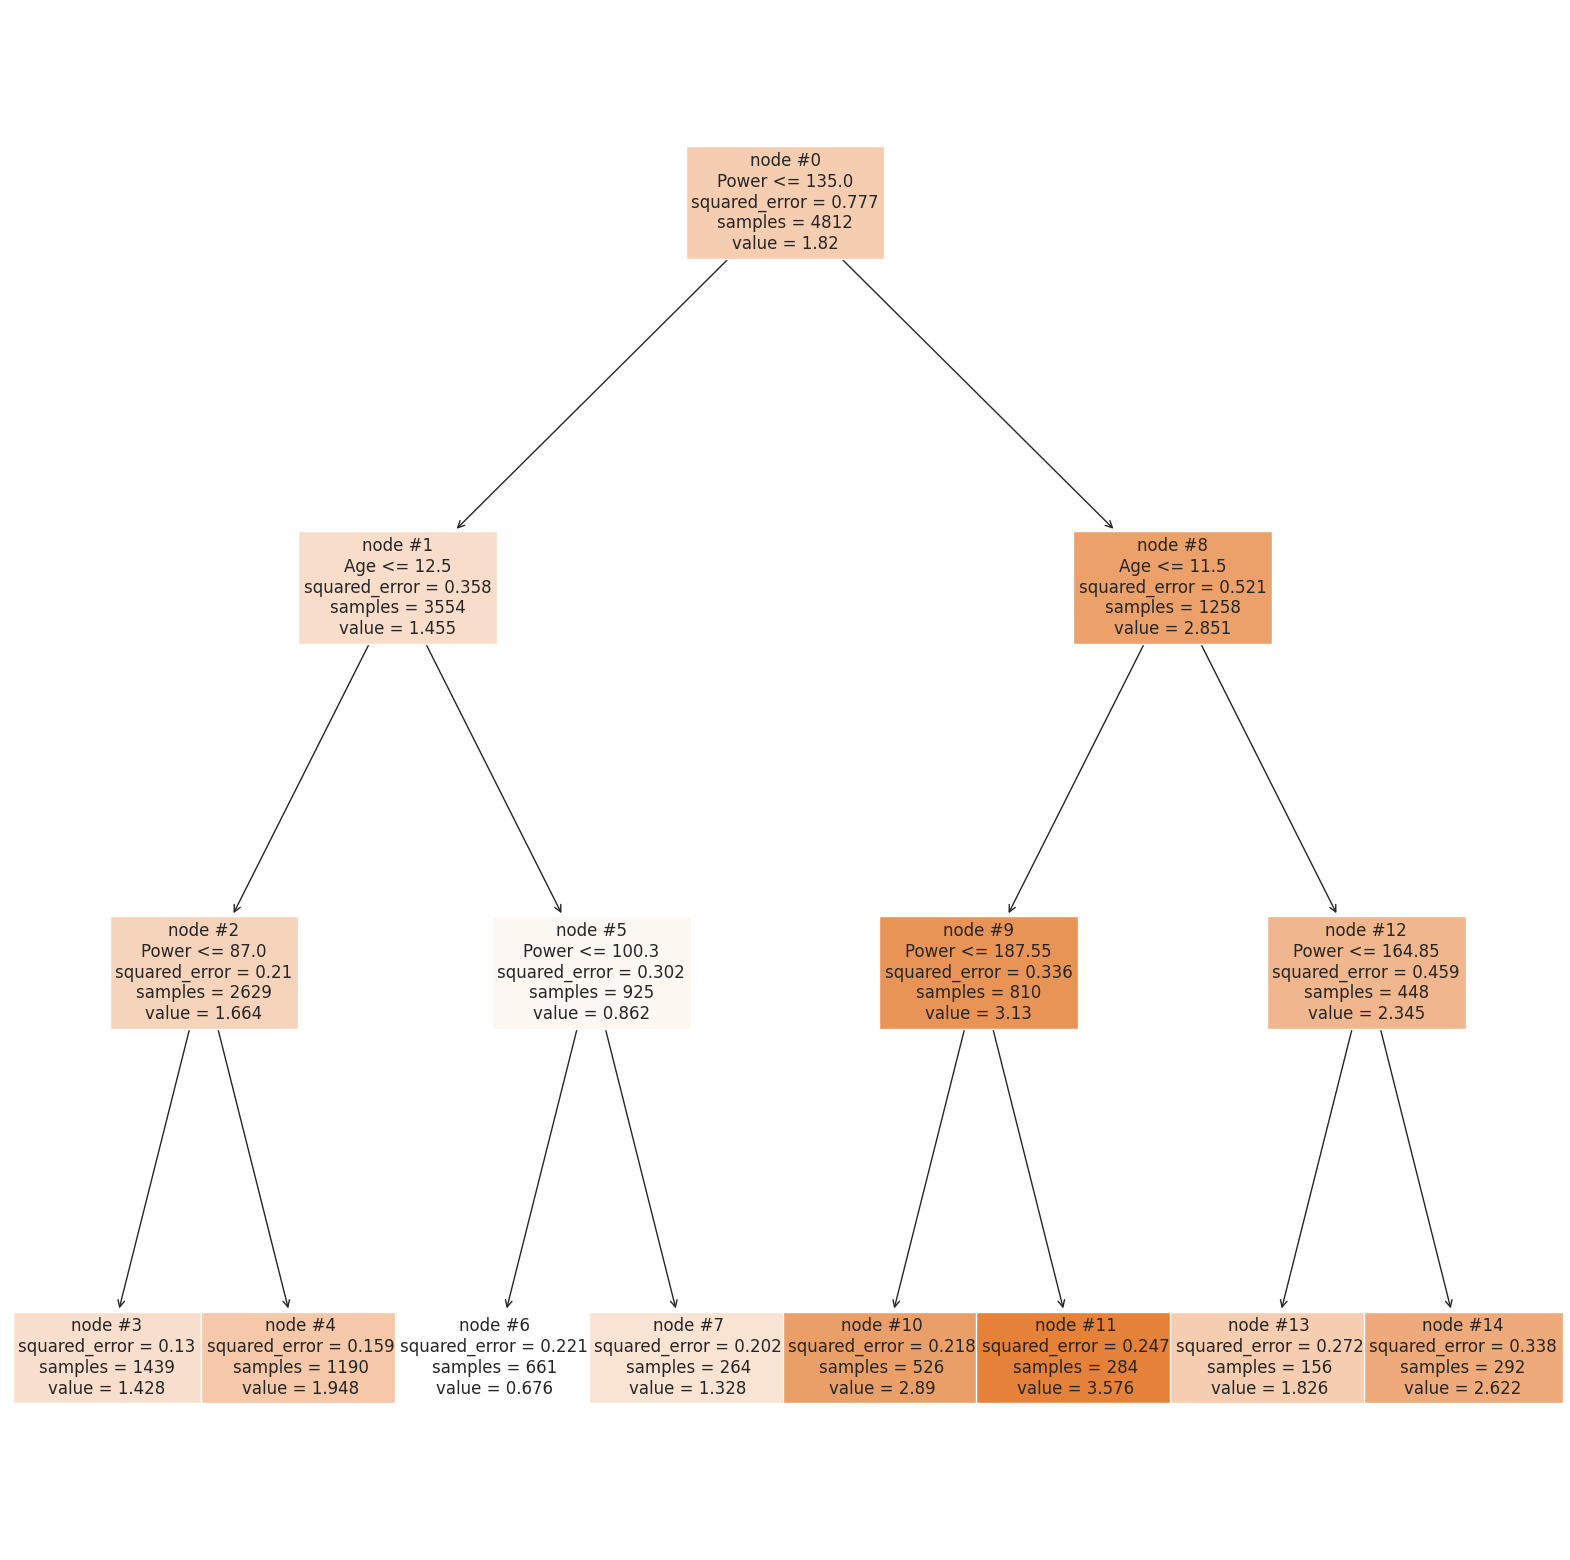

In [224]:
from sklearn import tree
features = list(X.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=3)

# Fitting the model
dt_regressor_visualize.fit(X_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)
plt.show()

In [225]:
print(tree.export_text(dt_regressor_visualize, feature_names=X_train.columns.tolist(), show_weights=True))

|--- Power <= 135.00
|   |--- Age <= 12.50
|   |   |--- Power <= 87.00
|   |   |   |--- value: [1.43]
|   |   |--- Power >  87.00
|   |   |   |--- value: [1.95]
|   |--- Age >  12.50
|   |   |--- Power <= 100.30
|   |   |   |--- value: [0.68]
|   |   |--- Power >  100.30
|   |   |   |--- value: [1.33]
|--- Power >  135.00
|   |--- Age <= 11.50
|   |   |--- Power <= 187.55
|   |   |   |--- value: [2.89]
|   |   |--- Power >  187.55
|   |   |   |--- value: [3.58]
|   |--- Age >  11.50
|   |   |--- Power <= 164.85
|   |   |   |--- value: [1.83]
|   |   |--- Power >  164.85
|   |   |   |--- value: [2.62]



**Let's plot the feature importance and check the most important features.**

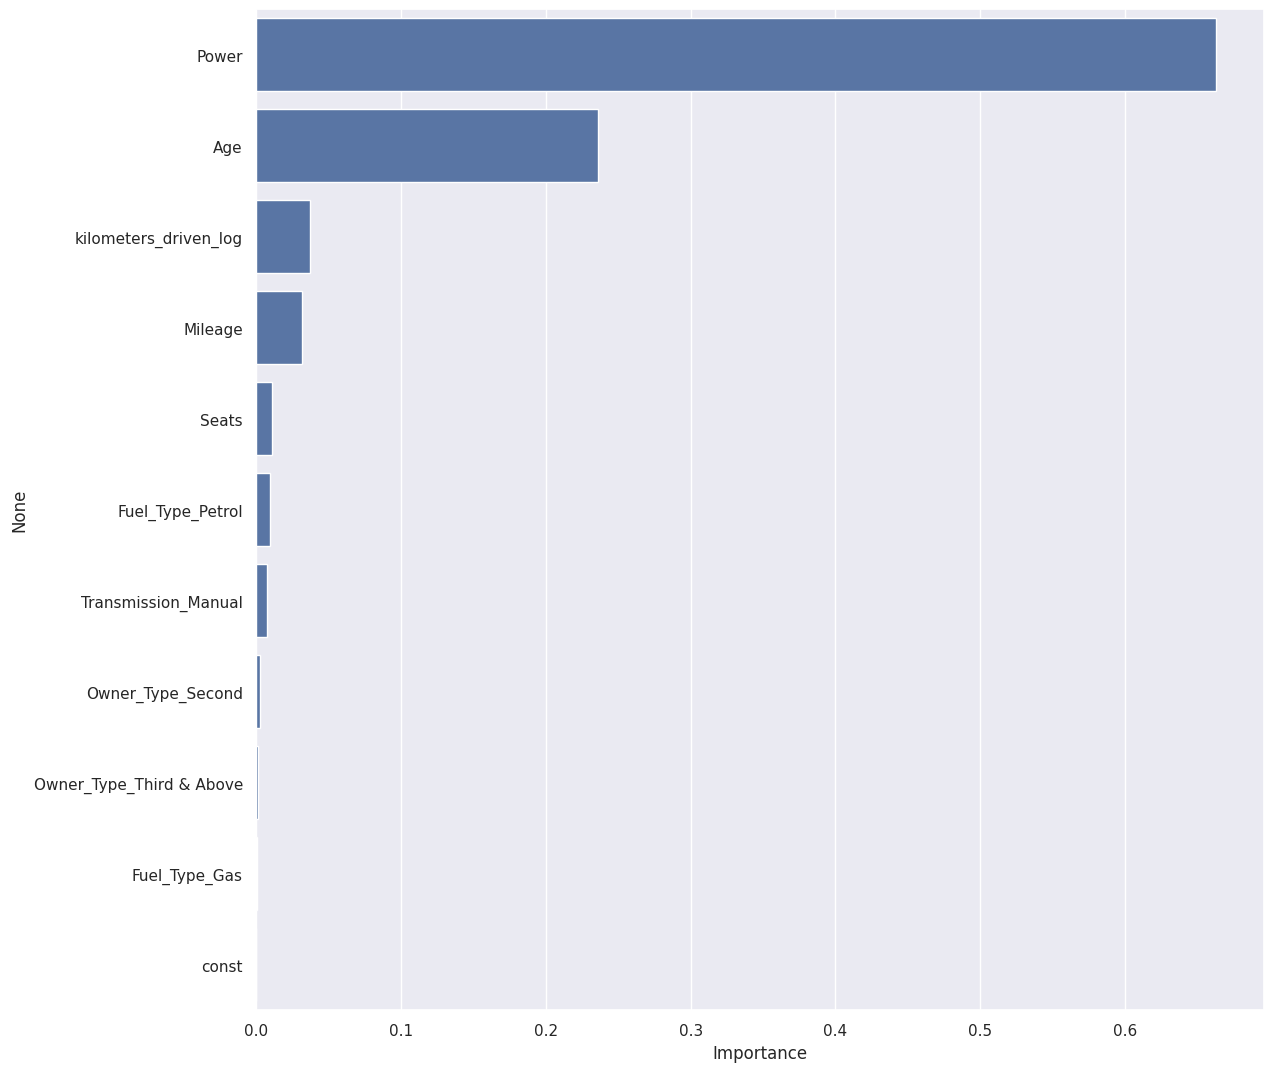

In [226]:
# Feature importance
importances = dt_regressor.feature_importances_

# Rename columns
columns = X.columns

# Create a DataFrame with features importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

**Feature importance**
- We can see that the most important features of our Decision Trees are Fuel, followed by Age and kilometers_driven_log
- The least important features are Fuel_Type_Gas, Owner_Type_Third & Above and Second



In [227]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(X_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, X_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244475,0.173571,0.91573,0.914951,inf


Using the Bagging regressor we get an R-Squared of 0.91, which is better that the initial Decision Tree

### **Hyperparameter Tuning: Random Forest**

In [228]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.228833,0.168885,0.926168,0.925486,inf


We get an initial R-Squared of 0.92 with the Random Forest, it is better than the DT and Bagging regressor

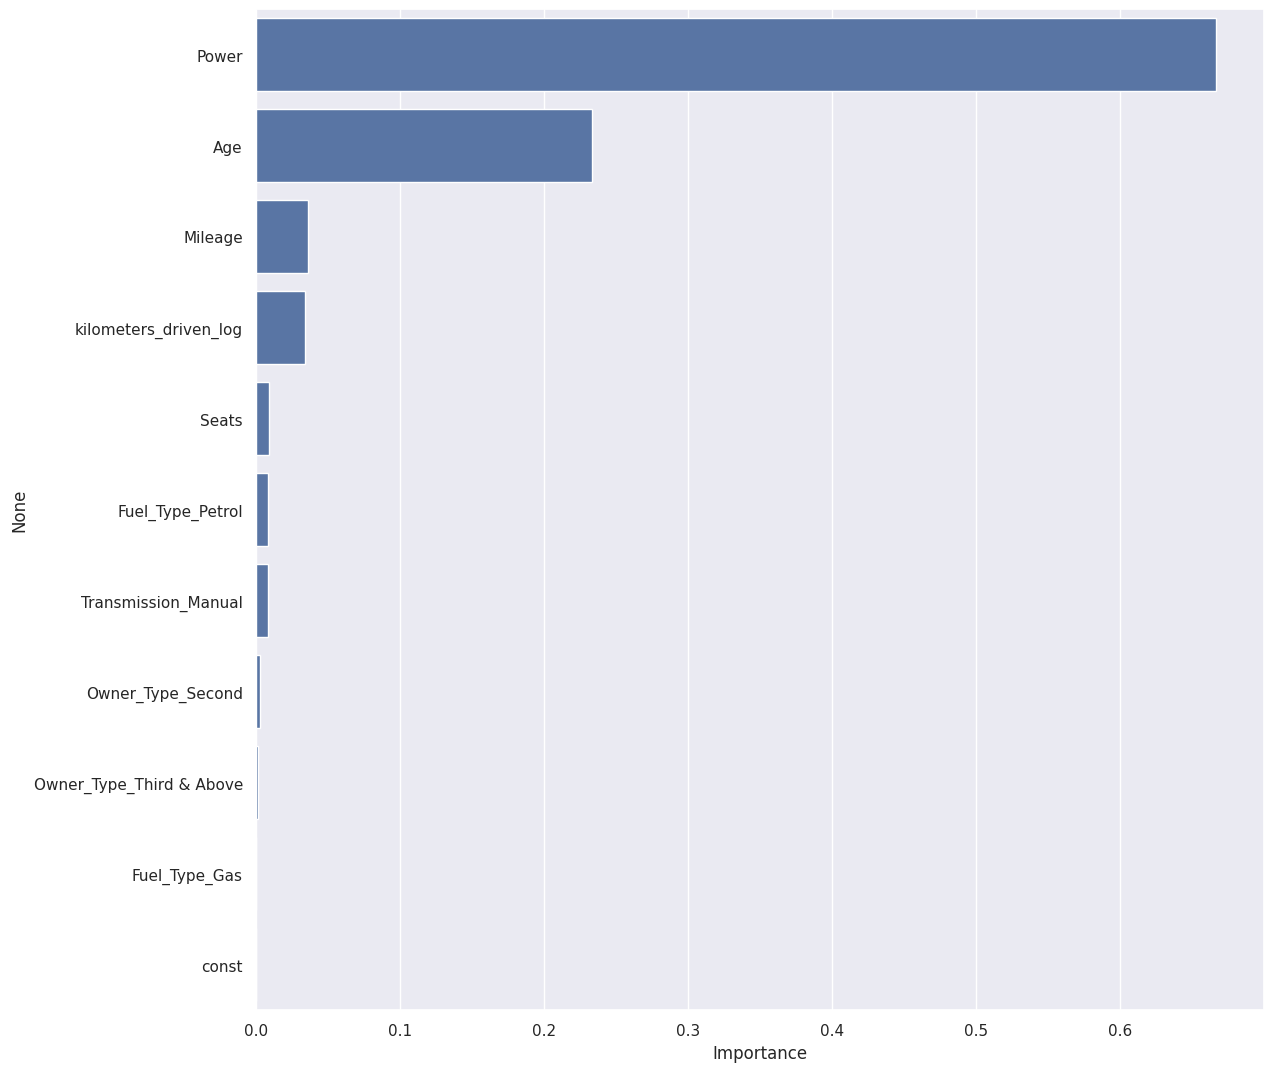

In [229]:
# Feature importance
importances = rf_regressor.feature_importances_

# Rename columns
columns = X.columns

# Create a DataFrame with features importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

We get the same most important features than before, showing the same features are adding to the Random Forest model as well

## **AdaBoost**

In [230]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(X_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, X_test, y_test)

ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.343313,0.26813,0.833817,0.832282,inf


We get an R-Squared of 0.83 with the AdaBoost, out metric decrease quite a bit comparing to the other models

## **Gradient Boosting Regressor**

In [231]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(X_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, X_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.242683,0.187143,0.916961,0.916194,inf


We get an R-Squared of 0.91 using Gradient Boosting Regressor

## **XGBoost Regressor**

In [232]:
# Installing the xgboost library using the 'pip' command
!pip install xgboost

In [233]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, X_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.21772,0.161132,0.933165,0.932548,inf


Using the XGBoost Regressor we get the best R-Squared value of 0.93, this means that this is the model that is perfoming better out of all the ones we have

## **Models' Performance Comparison**

Comparing different machine learning models is an important step in the modeling process, as it allows us to understand the strengths and weaknesses of each model, and to choose the best one for a particular task.

In the context of regression, we can compare models based on various performance metrics, such as **Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared, Adjusted R-squared and others**.

In [234]:
model2_perf_test = model_performance_regression(model2, X_test,y_test)

In [235]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T,
        model2_perf_test.T

    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor",
    "Linear regression"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.333267,0.228394,0.843401,0.841955,inf
Bagging Regressor,0.244475,0.173571,0.915730,0.914951,inf
Random Forest regressor,0.228833,0.168885,0.926168,0.925486,inf
Ada Boost Regressor,0.343313,0.268130,0.833817,0.832282,inf
Gradient Boosting Regressor,0.242683,0.187143,0.916961,0.916194,inf
XG Boost Regressor,0.217720,0.161132,0.933165,0.932548,inf
Linear regression,0.288778,0.223372,0.882420,0.881334,inf


**Feature Importance**

- As we confirmed before the XG Boost Regressor is the best performing model
- The Ada Boost Regressor had the poorest performance with R-Squared of 0.83


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

When evaluating all models within this project, the XG Boost Regressor stands out as the top performer, boasting an impressive R-squared value of 0.93. This signifies that the model effectively captures 93% of the variance present in the dependent variable using the independent features.

The XG Boost Regressor has the lowest RMSE and MAE, indicating that it produces the smallest errors in predictions compared to other models.

The Bagging Regressor and Random Forest Regressor also perform well in terms of accuracy and variance explained, followed by the Gradient Boosting Regressor and Linear Regression.

In summary, the analysis indicates that the XG Boost Regressor outperforms other techniques in terms of accuracy and variance explained. However, there is potential for further improvement through techniques like parameter tuning, exploring different ensemble methods, or enhancing feature engineering processes.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

Looking at our data and all the models that we applied, it is safe to say that Power and Age emerge as the two most important features influencing the price of used cars. Power, representing the maximum power of the engine in bhp, likely reflects the performance and desirability of the vehicle, while Age, indicating the manufacturing year of the car, captures the depreciation factor and overall condition. These insights align with industry expectations, where newer cars with higher power tend to command higher prices in the used car market.

Furthermore, the test performance comparison highlights the superiority of ensemble methods, particularly Random Forest, over traditional linear regression and decision tree models. The Random Forest regressor consistently outperforms in terms of predictive accuracy, as evidenced by its lower RMSE and MAE, and higher R-squared values. This underscores the effectiveness of leveraging ensemble techniques to capture complex relationships and interactions among features, resulting in more accurate price predictions for used cars.

Overall, these insights provide valuable guidance for stakeholders in the automotive industry and the buyers, enabling them to make informed decisions regarding pricing strategies, inventory management, and customer engagement. By understanding the relative importance of features and leveraging advanced modeling techniques, businesses can optimize their pricing strategies and enhance competitiveness in the dynamic used car market.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

The model I propose to be adopted is the XG Boost Regressor, because is the one performing better out of all the models that we have done in this project, it's got an R Square of 0.93 that is a great metric, explain the data very well, but the rest of the models also perform almost as good with R Squares ranging from 0.83 to 0.92